<a href="https://colab.research.google.com/github/Asfak21/Cardiovascular_Risk_Prediction/blob/main/Capstone_3_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Cardiovascular Risk Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name-** Asfakullah Layek


# **Project Summary -**

 The dataset of Cardiovascular Risk Prediction contains information on 3,390 individuals with 16 predictor variables and 1 target variable. There have demographic, behavioral, and medical risk factors. Wehave tasked to predict the 10-year risk of developing coronary heart disease (CHD). 

 After understanding Problem statement we do following things 
   
   * Importing the libraries and the dataset
   * Understand the data
   * Cleaned the data, handled the null values
   * Typecasted the needed features
   * We performed Exploratory data analysis
   * Feature selection and Data preprocessing
   * Removing multicollinearity with by various inflation factor(VIF
   *  ML model implementation
   * Implimented Logistic Regression and followed by the Random forest, , Naive Bayes, KNN,XGboost.
   * And conclusions
   after all we have building a machine learning model on Cardiovascular risk prediction data, we applied combination of data processing, machine learning techniques, and model evaluation skills. It was a challenging task. we successfully created a model that can accurately predict a patient that can be infected with CHD in future.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The dataset is from ongoing cardiovascular study on residents of the town of Framingham, Massachutts. The classification goal is to predict whether the patient has a 10-year risk of failure coronary heart disease(CHD). The dataset provides the patient's information . It includes over 4000 records and 15 attributes. Each attribute is a potental risk factor. There are both demographic, behavioral, and medical risk factor.

Below are **Field** with **Description**

**Sex**-    gender

**Age-**    age 

**is_smoking**-   Whether smoking currently or not 

**Cigs Per Day**-  Cigarettes smoked per day 

**BP_Meds**-  Whether taking BP meds or not 

**Prevalent Stroke**- If the patient has a history of stroke

**Prevalent hyp**- If the patient has a history of hypertension 

**Diabetes**- Patient has diabetes or not

**Tot Chol**-  Cholesterol measure 

**Sys BP** -  BP measure 

**Dia BP** -  BP measure 

**BMI**-  Body Mass Index

**Heart Rate**-  Heart Rate measure


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

# Modules for dataframe , ndarrays and math
import numpy as np
import pandas as pd
import math

# For Data visualizations package
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})

# importing missingo library which helps us to visualize the missing values
import missingno as msno

from sklearn.preprocessing import FunctionTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, recall_score, f1_score
     

### **Dataset Loading**

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**CSV file location & reading CSV file**

In [ ]:
# Read CSV file
df_cardio = pd.read_csv('/content/drive/My Drive/Alma Better/Capstone Project 3/data_cardiovascular_risk.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df_cardio.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df_cardio.shape

(3390, 17)

### Dataset Information

In [ ]:
# Dataset Info
df_cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df_cardio.duplicated().sum()

0

We can see do not have any duplicated rows in the datase

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df_cardio.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<AxesSubplot:>

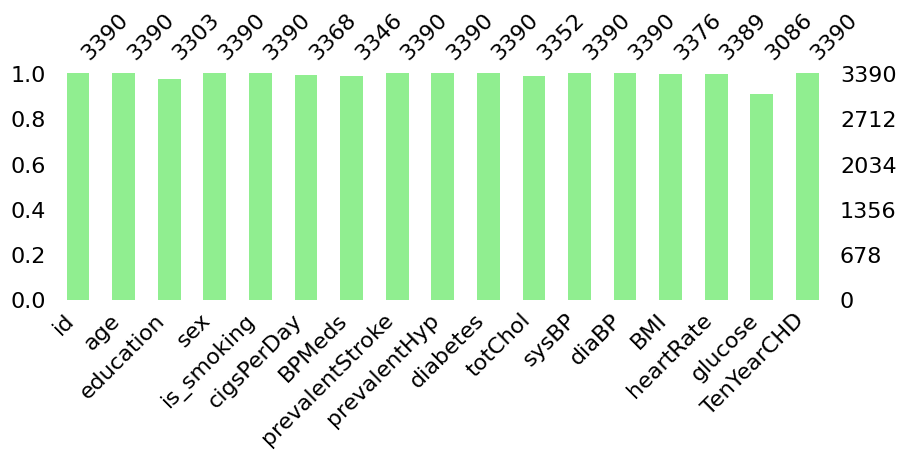

In [ ]:
# Visualizing the missing values
msno.bar(df_cardio,figsize=(10,3), color="lightgreen")

### What did you know about your dataset?



1.   In this dataset have 3390 rows and 17 columns.
2.   In this dataset  don't have any duplicated observations.
3.   we can see 'sex' and 'is_smoking' feature is of object dype and rest others are numeric in nature.   



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df_cardio.columns.to_list()

['id',
 'age',
 'education',
 'sex',
 'is_smoking',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [ ]:
# Dataset Describe
df_cardio.describe(include="all")

id          age    education   sex is_smoking   cigsPerDay  \
count   3390.000000  3390.000000  3303.000000  3390       3390  3368.000000   
unique          NaN          NaN          NaN     2          2          NaN   
top             NaN          NaN          NaN     F         NO          NaN   
freq            NaN          NaN          NaN  1923       1703          NaN   
mean    1694.500000    49.542183     1.970936   NaN        NaN     9.069477   
std      978.753033     8.592878     1.019081   NaN        NaN    11.879078   
min        0.000000    32.000000     1.000000   NaN        NaN     0.000000   
25%      847.250000    42.000000     1.000000   NaN        NaN     0.000000   
50%     1694.500000    49.000000     2.000000   NaN        NaN     0.000000   
75%     2541.750000    56.000000     3.000000   NaN        NaN    20.000000   
max     3389.000000    70.000000     4.000000   NaN        NaN    70.000000   

             BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count   3346.000000      3390.000000   3390.000000  3390.000000  3352.000000   
unique          NaN              NaN           NaN          NaN          NaN   
top             NaN              NaN           NaN          NaN          NaN   
freq            NaN              NaN           NaN          NaN          NaN   
mean       0.029886         0.006490      0.315339     0.025664   237.074284   
std        0.170299         0.080309      0.464719     0.158153    45.247430   
min        0.000000         0.000000      0.000000     0.000000   107.000000   
25%        0.000000         0.000000      0.000000     0.000000   206.000000   
50%        0.000000         0.000000      0.000000     0.000000   234.000000   
75%        0.000000         0.000000      1.000000     0.000000   264.000000   
max        1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count   3390.00000  3390.000000  3376.000000  3389.000000  3086.000000   
unique         NaN          NaN          NaN          NaN          NaN   
top            NaN          NaN          NaN          NaN          NaN   
freq           NaN          NaN          NaN          NaN          NaN   
mean     132.60118    82.883038    25.794964    75.977279    82.086520   
std       22.29203    12.023581     4.115449    11.971868    24.244753   
min       83.50000    48.000000    15.960000    45.000000    40.000000   
25%      117.00000    74.500000    23.020000    68.000000    71.000000   
50%      128.50000    82.000000    25.380000    75.000000    78.000000   
75%      144.00000    90.000000    28.040000    83.000000    87.000000   
max      295.00000   142.500000    56.800000   143.000000   394.000000   

         TenYearCHD  
count   3390.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean       0.150737  
std        0.357846  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

### Variables Description 

Sex- gender

Age- age

is_smoking- Whether smoking currently or not

Cigs Per Day- Cigarettes smoked per day

BP_Meds- Whether taking BP meds or not

Prevalent Stroke- If the patient has a history of stroke

Prevalent hyp- If the patient has a history of hypertension

Diabetes- Patient has diabetes or not

Tot Chol- Cholesterol measure

Sys BP - BP measure

Dia BP - BP measure

BMI- Body Mass Index

Heart Rate- Heart Rate measure

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df_cardio.columns:
  print(f"'{i}' : {df_cardio[i].nunique()}")

'id' : 3390
'age' : 39
'education' : 4
'sex' : 2
'is_smoking' : 2
'cigsPerDay' : 32
'BPMeds' : 2
'prevalentStroke' : 2
'prevalentHyp' : 2
'diabetes' : 2
'totChol' : 240
'sysBP' : 226
'diaBP' : 142
'BMI' : 1259
'heartRate' : 68
'glucose' : 132
'TenYearCHD' : 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# storing the features that contains null values in a separate list
null_list= ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']

<AxesSubplot:>

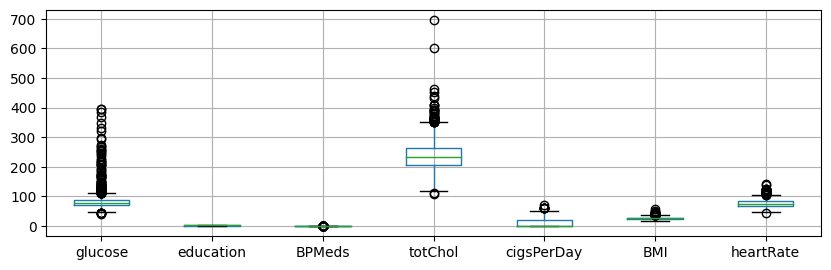

In [ ]:
# plotting seaborn box plot to check the outliers in CompetitionDistance features
plt.figure(figsize=(10,3))
#sns.boxplot(df_cardio["null_list"()])
df_cardio[null_list].boxplot()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

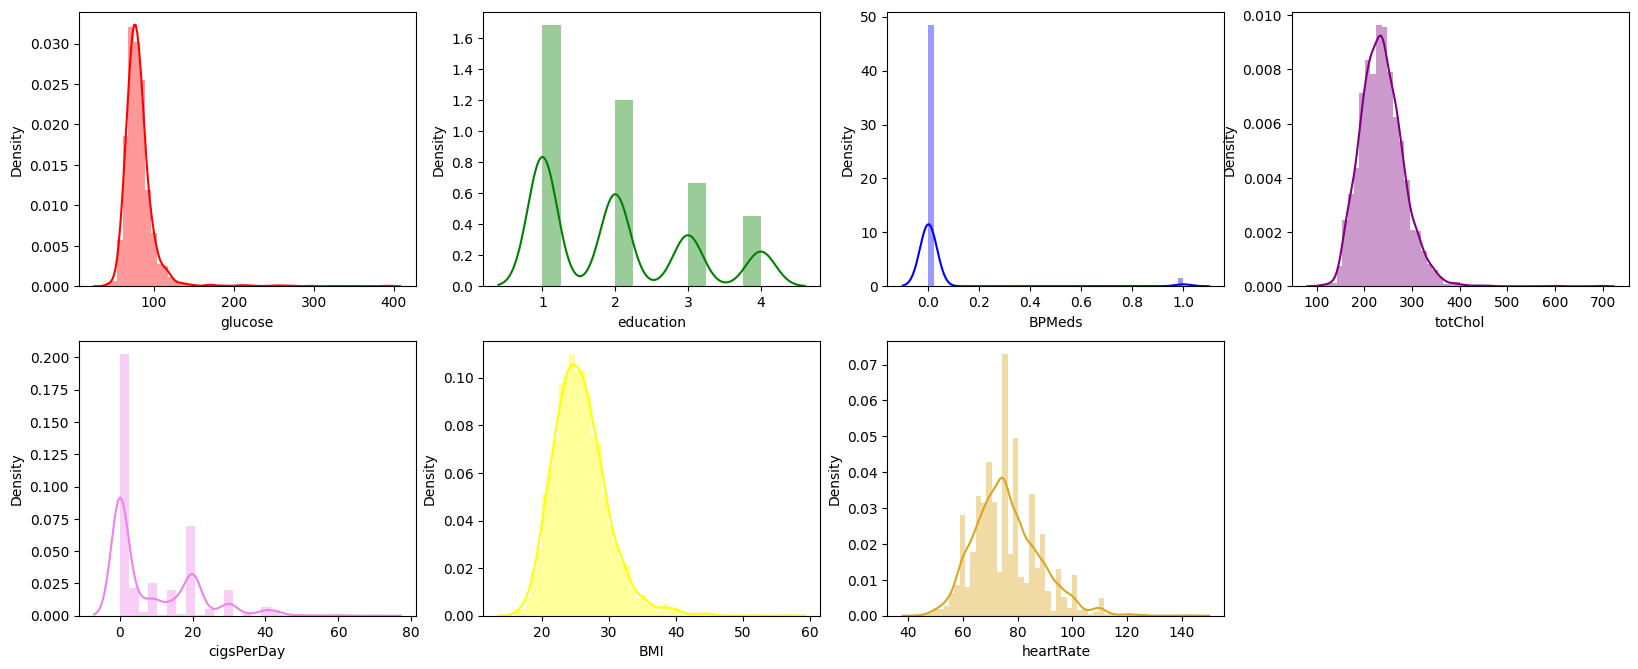

In [ ]:
# frequency distribution plot for checking the distribution of each feature that contains null values
plt.figure(figsize=(20,8))
colour= ['red','green','blue','purple','violet','yellow','goldenrod','deepgreen']
for i,j in zip(null_list, colour):
  ax= plt.subplot(2,4,null_list.index(i)+1)
  sns.distplot(df_cardio[i],color=j)
plt.show()

### What all manipulations have you done and insights you found?

Lets see when we used Mean,Median and Mode below:
1.  Mean is used when we have normal distributed data and do not contain any outlier.
2. Median is used when the data is numerical, continous and contains extreme values (outliers).
3. Mode is used when the data is categorical in nature.

Here, we can observe that 7 variables are having missing values.By checking the outliers and distribution of the data we are going to impute the null values of:

1. "glucose" -> Median

2. "education" -> Mode

3. "BPMeds" -> Mode

4. "totChol" -> Median

5. "cigsPerDay" -> Mean

6. "BMI" -> Median

7. "heartRate" -> Median

In [ ]:
# Fill up the Null values of each feature
df_cardio['glucose'].fillna(df_cardio['glucose'].median(), inplace=True)
df_cardio['education'].fillna(df_cardio['education'].mode()[0], inplace=True)
df_cardio['BPMeds'].fillna(df_cardio['BPMeds'].mode()[0], inplace=True)
df_cardio['totChol'].fillna(df_cardio['totChol'].median(), inplace=True)
df_cardio['cigsPerDay'].fillna(df_cardio['cigsPerDay'].mean(), inplace=True)
df_cardio['BMI'].fillna(df_cardio['BMI'].median(), inplace=True)
df_cardio['heartRate'].fillna(df_cardio['heartRate'].median(), inplace=True)

In [ ]:
# Rechecking the null values in the dataset
df_cardio.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
# now separating the categorical and continous variable and storing them into different lists (excluding 'id')
categorical_variable=[]
continous_variable=[]

for i in df_cardio.columns:
  if i == 'id':
    pass
  elif df_cardio[i].nunique() <10:
    categorical_variable.append(i)
  elif df_cardio[i].nunique() >= 10:
    continous_variable.append(i)

In [ ]:
# Checking the definded lists
print(categorical_variable)
print(continous_variable)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In order to visualize each chart properly we will do data visualization in a structured way following ' UBM ' rule:

Univariate Analysis

Bivariate Analysis

Multivariate Analysis

Lets do **Univariate Ana**lysis

#### Chart - 1

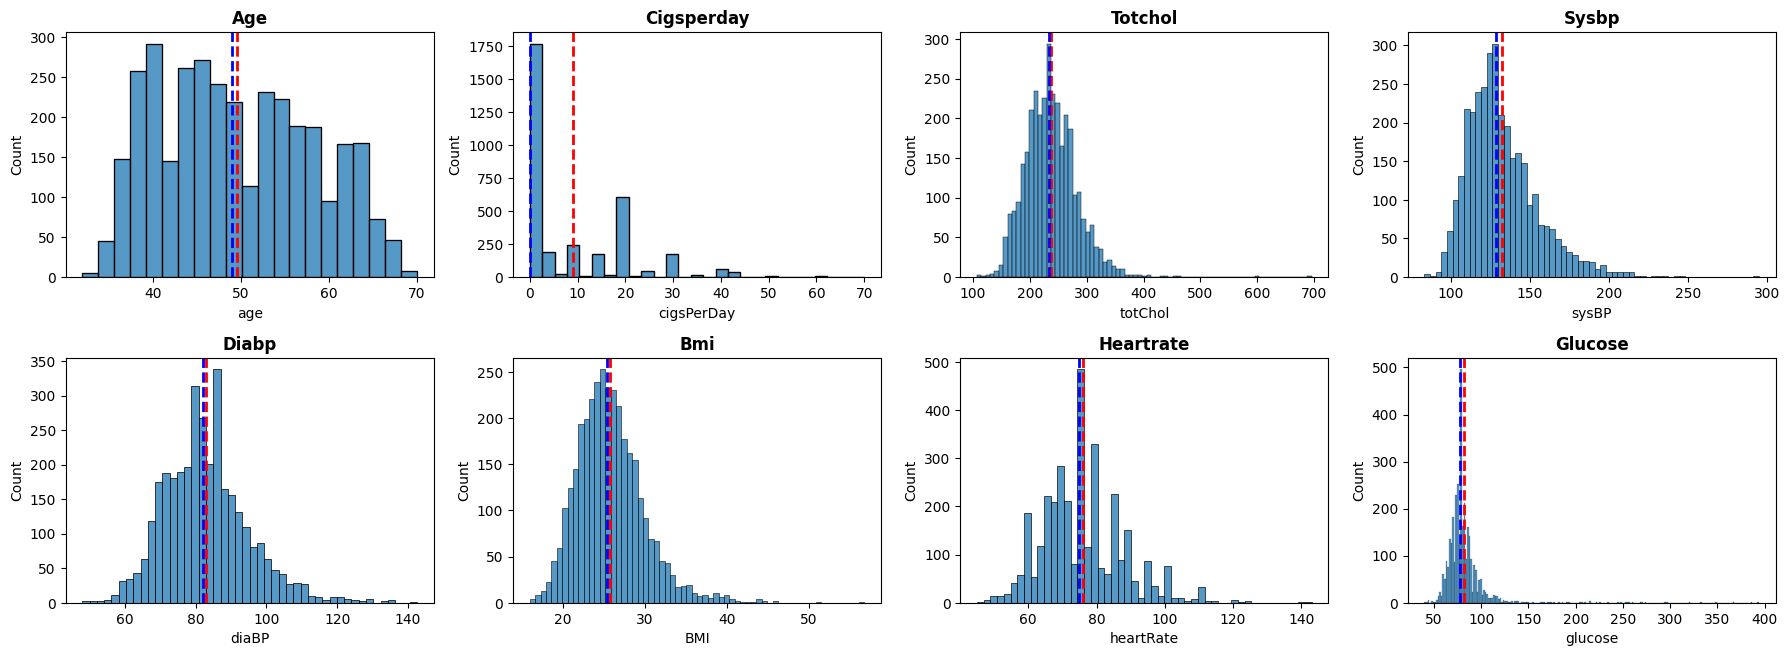

In [ ]:
# Visualizing the mean and median.
plt.figure(figsize=(18,16))
for n,column in enumerate(continous_variable):
  feature = df_cardio[column]
  ax=plt.subplot(5, 4, n+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

We picked this chart as it shows whether the observations are high or low and also whether they are concentrated in one area or spread out across the entire scale.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

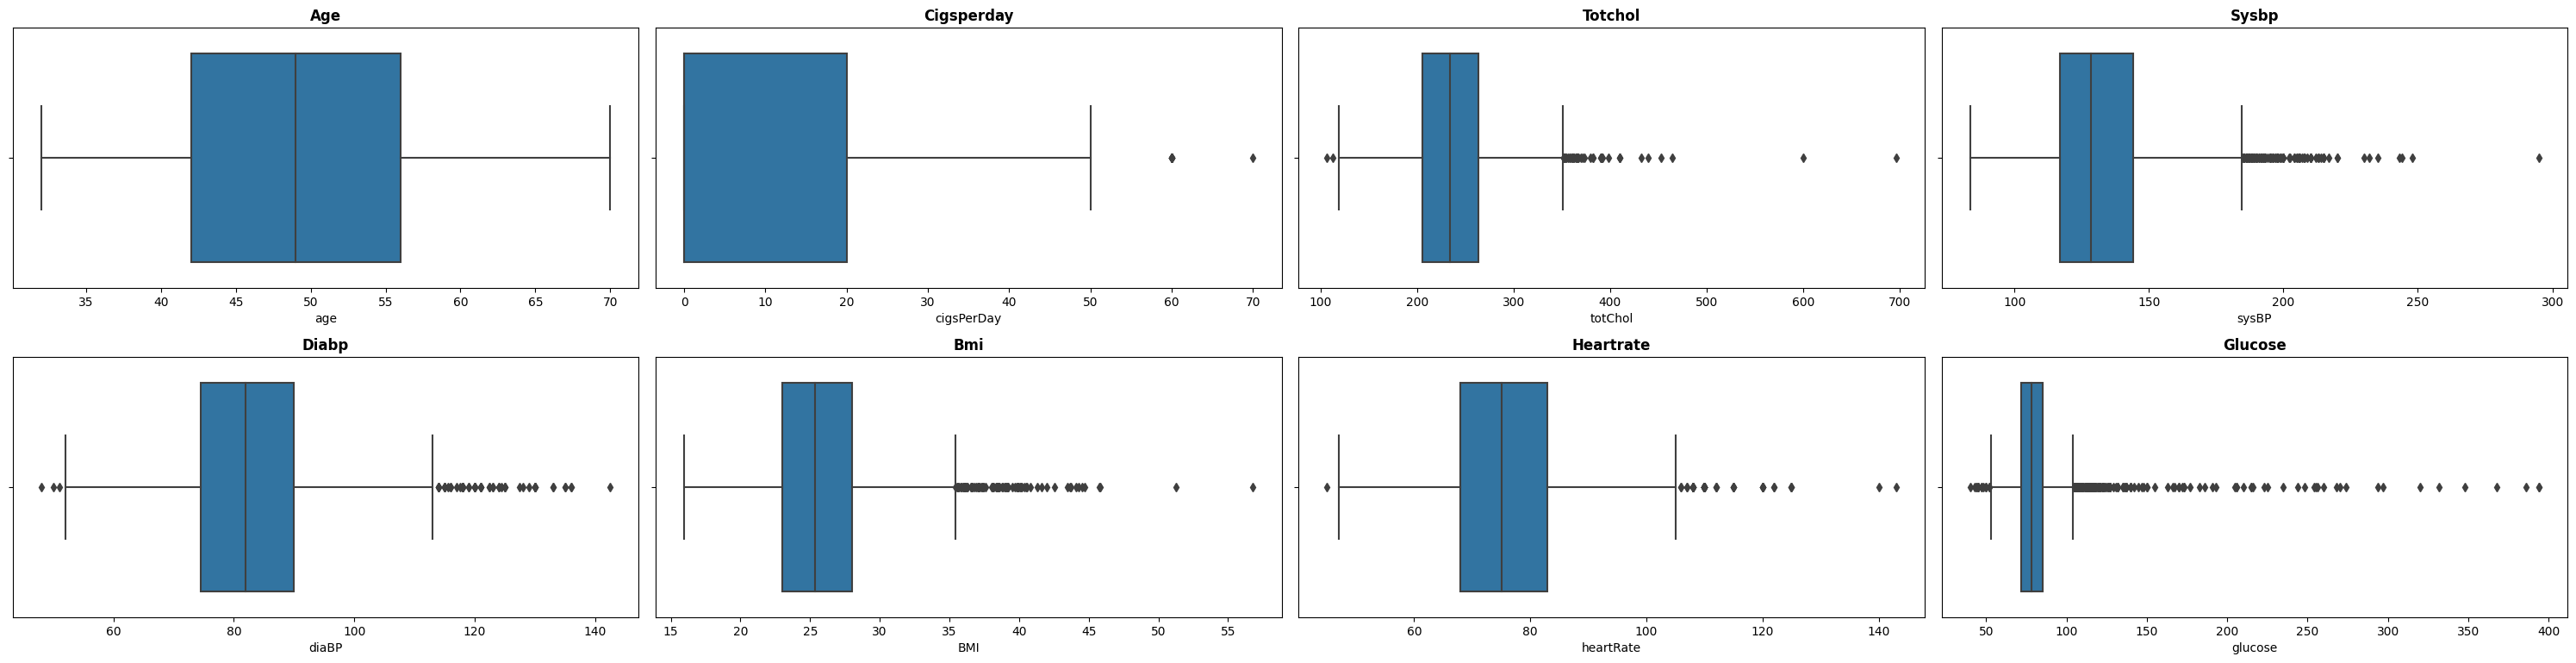

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(30,15))
for n,column in enumerate(continous_variable):
  plt.subplot(4, 4, n+1)
  sns.boxplot(df_cardio[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

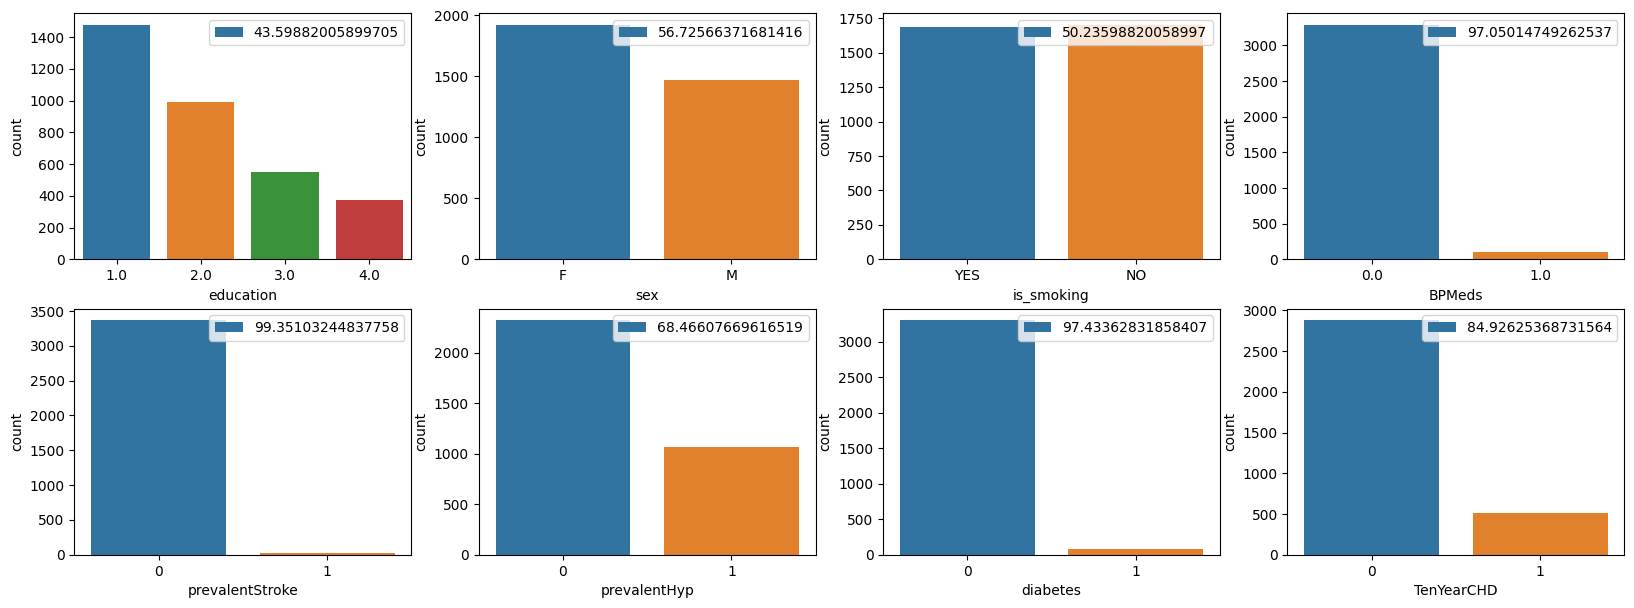

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(20,15))
for i,j in enumerate(categorical_variable):
  plt.subplot(4,4,i+1)
  sns.countplot(df_cardio[j])
  plt.legend(df_cardio[j].value_counts()*100/len(df_cardio[j]))
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

**Bivariate Analysis**

#### Chart - 4

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diaBP', ylabel='sysBP'>

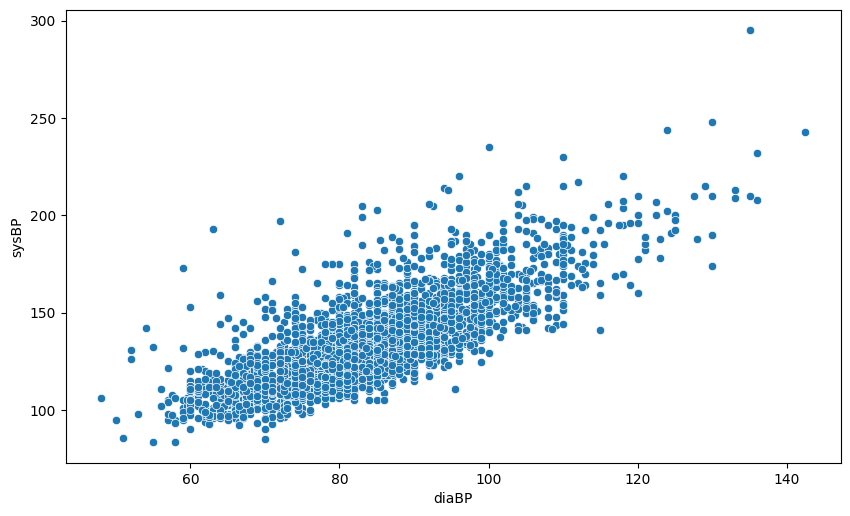

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(10,6))
sns.scatterplot(df_cardio['diaBP'],df_cardio['sysBP'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

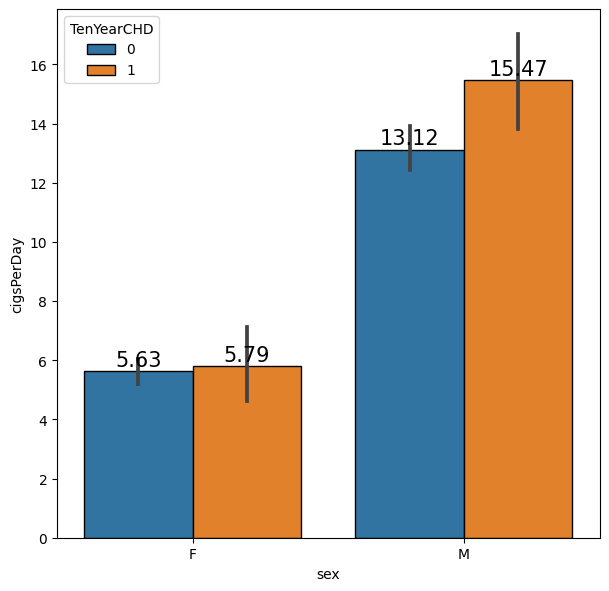

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(7,7))
plots=sns.barplot(x=df_cardio['sex'],y=df_cardio['cigsPerDay'],hue=df_cardio['TenYearCHD'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

**Multivariate Analysis**

#### Chart - 6 - Correlation Heatmap

<AxesSubplot:>

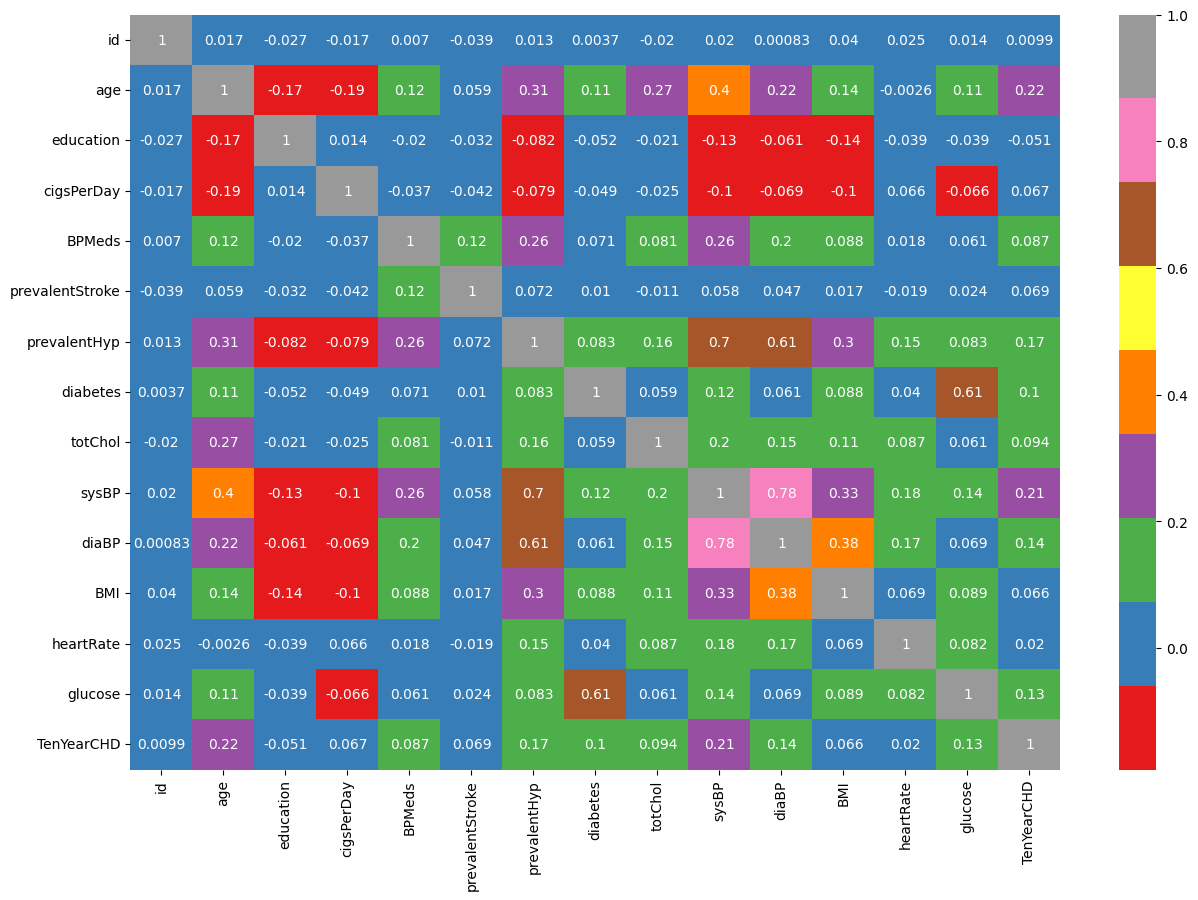

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,10))
sns.heatmap(df_cardio.corr(), annot=True, cmap=sns.color_palette("Set1"))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 7 - Pair Plot 

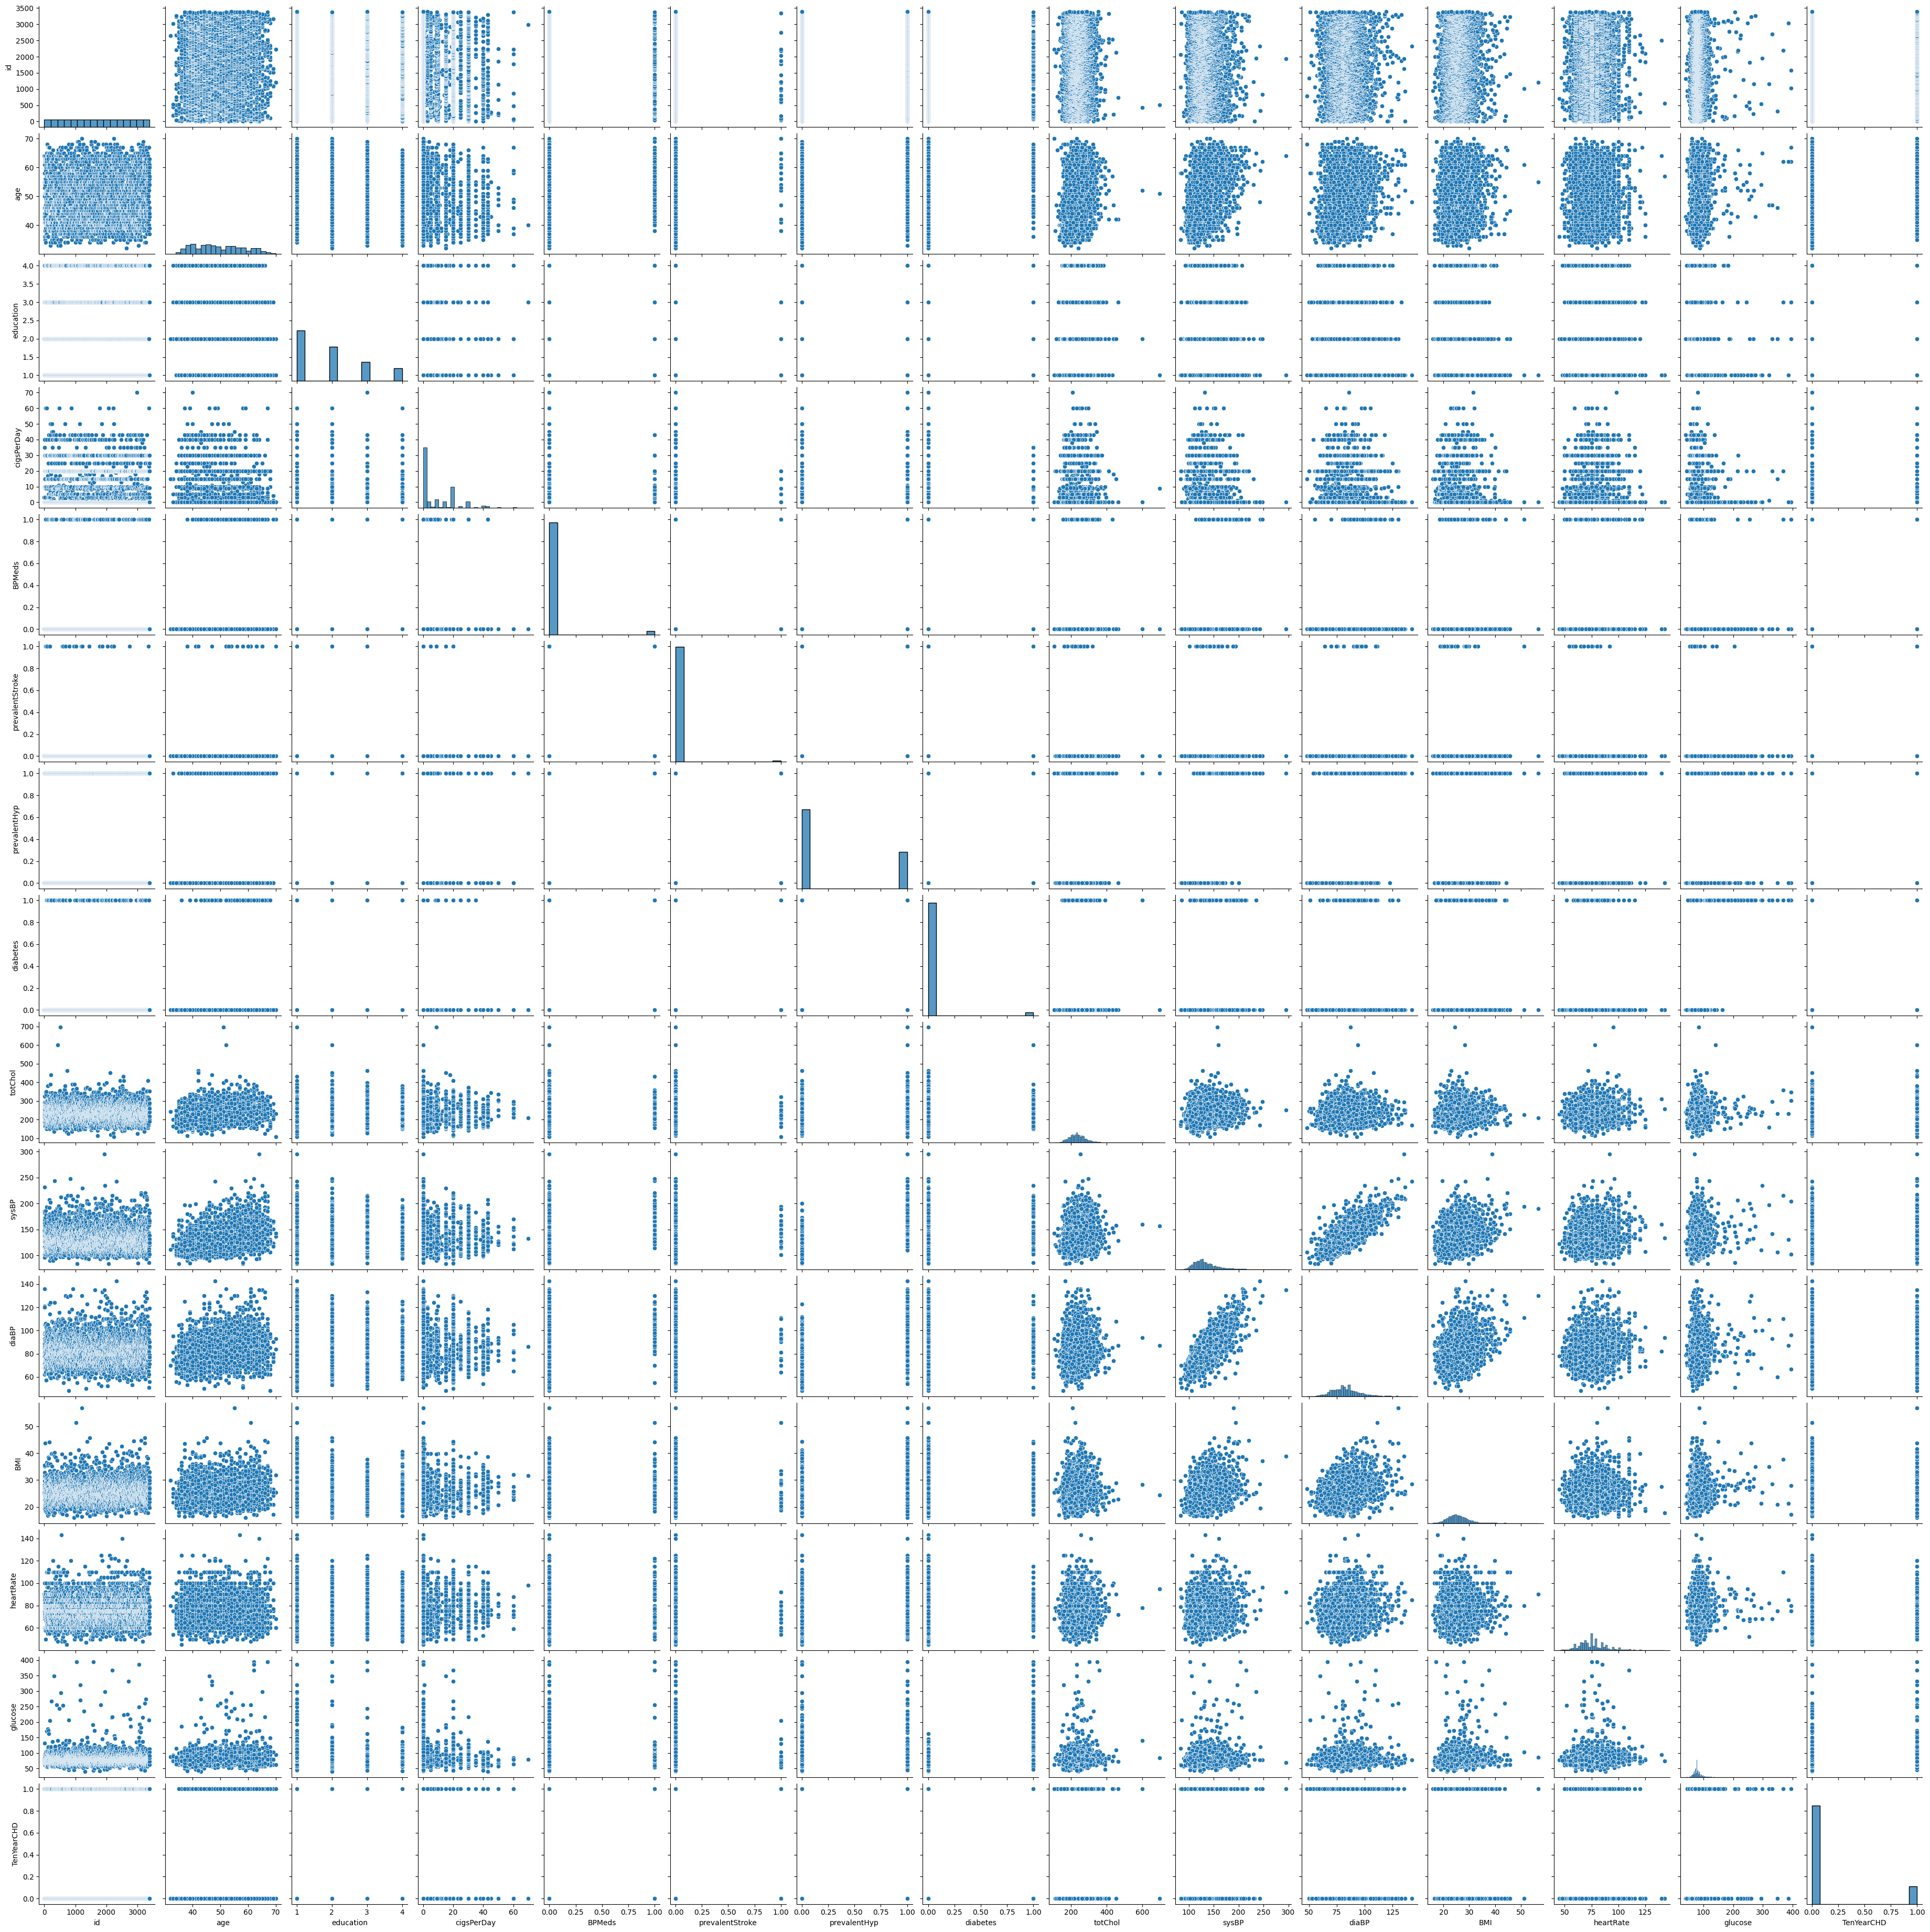

In [ ]:
# Pair Plot visualization code
sns.pairplot(df_cardio)
     

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1- Null Hypothesis - There is no relation between age and TenYearCHD

Alternate Hypothesis - There is a relationship between age and TenYearCHD

2- Null Hypothesis - There is no relation between diabetes and TenYearCHD

Alternate Hypothesis - There is a relation between diabetes and TenYearCHD

3- Null Hypothesis - There is no relation between heartRate and TenYearCHD

Alternate Hypothesis - There is a relation between heartRate and TenYearCHDSales

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis - There is no relation between age and TenYearCHD

Alternate Hypothesis - There is a relationship between age and TenYearCHD

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr
first_sample = df_cardio["age"].sample(n=150, random_state=0)
second_sample = df_cardio["TenYearCHD"].sample(n=150, random_state=0)

stat, p = pearsonr(first_sample, second_sample)
print('stat=%.3f, p = %.2f'%(stat, p))
if p> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')

stat=0.229, p = 0.00
Rejected Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis - There is no relation between diabetes and TenYearCHD

Alternate Hypothesis - There is a relation between diabetes and TenYearCHD

#### 2. Perform an appropriate statistical test.

In [ ]:
df_cardio.head(1)

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0  25.38       90.0     80.0   

   TenYearCHD  
0           1

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df_cardio.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# defining the code for outlier detection and percentage using IQR.
def detect_outliers(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q2 = np.percentile(data, 50)
    q3 = np.percentile(data, 75)
    print(f"q1:{q1}, q2:{q2}, q3:{q3}")

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print(f"Lower bound: {lwr_bound}, Upper bound: {upr_bound}, IQR: {IQR}")

    for i in data: 
        if (upr_bound):
            outliers.append(i)
    len_outliers= len(outliers)
    print(f"Total number of outliers are: {len_outliers}")

    print(f"Total percentage of outlier is: {round(len_outliers*100/len(data),2)} %")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

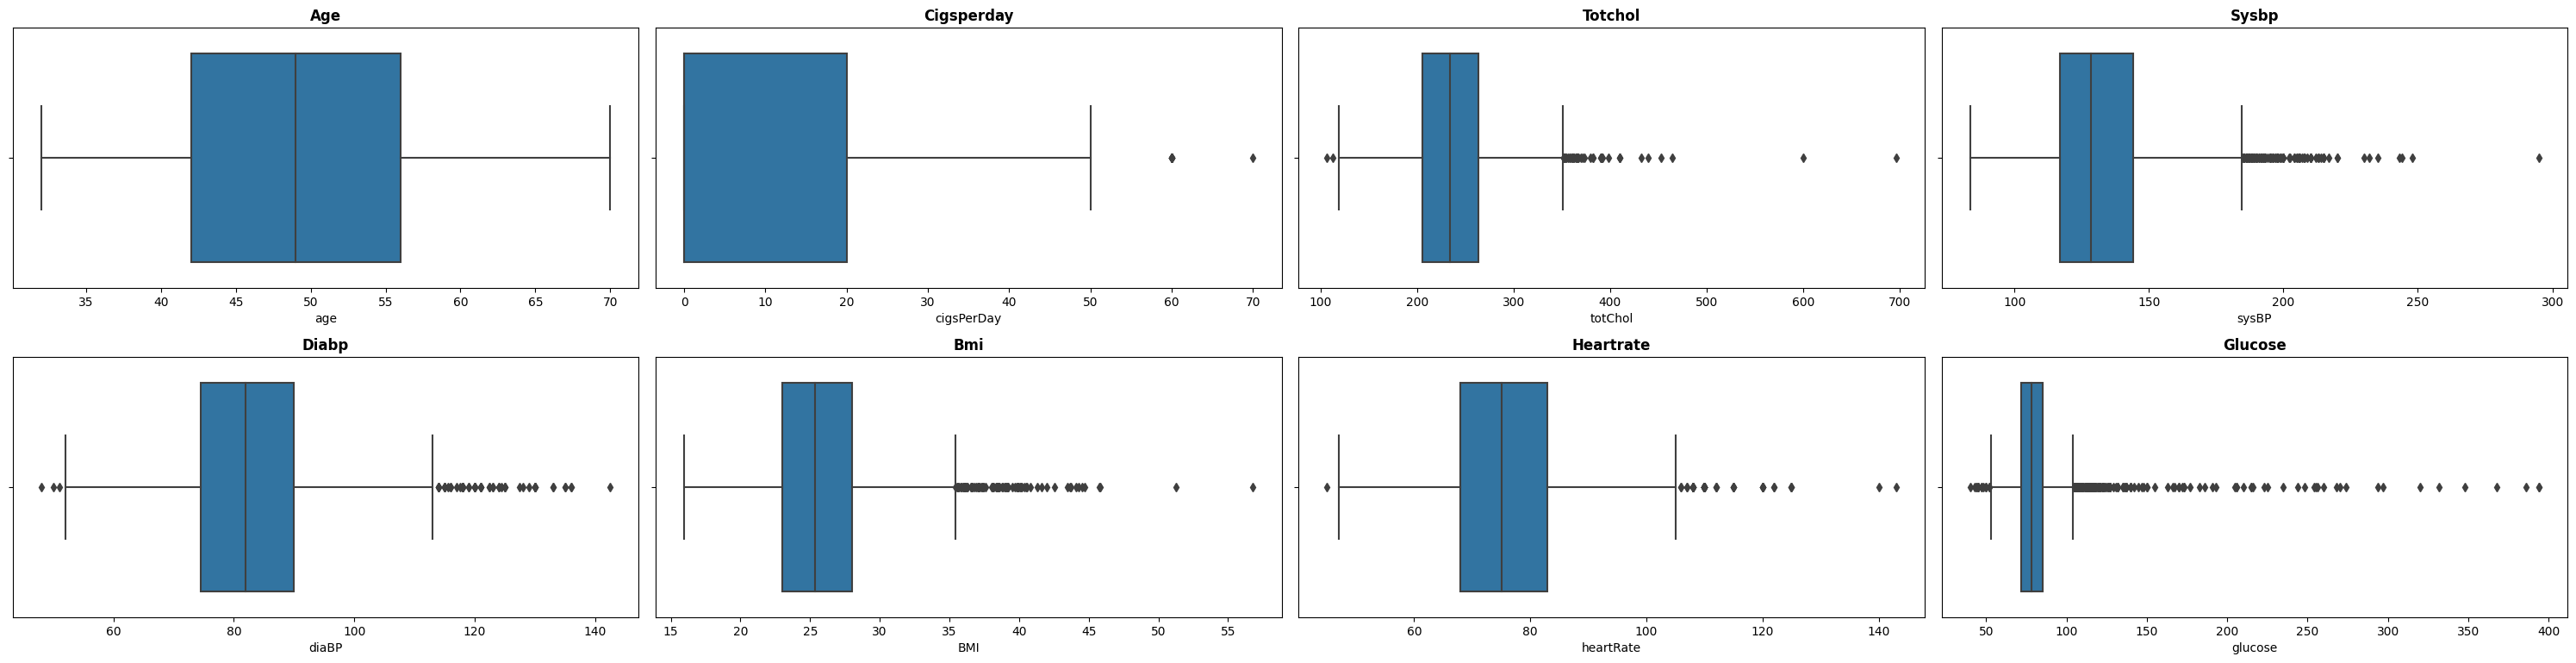

In [ ]:
# Plotting box plot for all the continous variable
plt.figure(figsize=(30,15))
for n,column in enumerate(continous_variable):
  plt.subplot(4, 4, n+1)
  sns.boxplot(df_cardio[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()
     

It is clear that we have outliers in most of the continous features but still we don't know the percentage of outliers in each of the feature. So, let's create a function that takes input as dataframe and list of continous feature and return the lower limit, upper limit,IQR, total outliers and percentage of outliers present in each continous feature.

In [ ]:
# Determining IQR, Lower and Upper bound and number out outliers present in each of the continous numerical feature
for feature in continous_variable:
  print(feature,":")
  detect_outliers(df_cardio[feature])
  print("-"*50)

age :
q1:42.0, q2:49.0, q3:56.0
Lower bound: 21.0, Upper bound: 77.0, IQR: 14.0
Total number of outliers are: 3390
Total percentage of outlier is: 100.0 %
--------------------------------------------------
cigsPerDay :
q1:0.0, q2:0.0, q3:20.0
Lower bound: -30.0, Upper bound: 50.0, IQR: 20.0
Total number of outliers are: 3390
Total percentage of outlier is: 100.0 %
--------------------------------------------------
totChol :
q1:206.0, q2:234.0, q3:264.0
Lower bound: 119.0, Upper bound: 351.0, IQR: 58.0
Total number of outliers are: 3390
Total percentage of outlier is: 100.0 %
--------------------------------------------------
sysBP :
q1:117.0, q2:128.5, q3:144.0
Lower bound: 76.5, Upper bound: 184.5, IQR: 27.0
Total number of outliers are: 3390
Total percentage of outlier is: 100.0 %
--------------------------------------------------
diaBP :
q1:74.5, q2:82.0, q3:90.0
Lower bound: 51.25, Upper bound: 113.25, IQR: 15.5
Total number of outliers are: 3390
Total percentage of outlier is: 100

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# Checking the object dtype variable
df_cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

So, we have only two object dtype variable (sex and is_smoking) with two categories Male and Female, No and Yes. We can easily encode these categorical variable from BINARY LABEL ENCODING (0,1) and change the dtype from object to int.

In [ ]:
# Encode your categorical columns
df_cardio['sex'].replace({'M':0,'F':1},inplace=True)
df_cardio['is_smoking'].replace({'NO':0,'YES':1},inplace=True)

In [ ]:
# Rechecking the info of dataset
df_cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   float64
 3   sex              3390 non-null   int64  
 4   is_smoking       3390 non-null   int64  
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# Checking the features to exctract new feature from it
df_cardio.head()

id  age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0    1           1         3.0     0.0                0   
1   1   36        4.0    0           0         0.0     0.0                0   
2   2   46        1.0    1           1        10.0     0.0                0   
3   3   50        1.0    0           1        20.0     0.0                0   
4   4   64        1.0    1           1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0  25.38       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In our dataset there are two features sysBP and diaBP and have normal range of 90/120 after and before this range a person could fall under the danger zone. In medical science there is a patient attribute called Mean Arterial Pressure (MAP), which is a weighted average of the Systolic and Diastolic BP. The formula for MAP is:

MAP = DP + 1/3(SP – DP) or MAP = DP + 1/3(PP)

Where DP is the diastolic blood pressure, SP is the systolic blood pressure, and PP is the pulse pressure and the normal range of MAP is 70-100.

So, let's create a feature of MAP which contains the information of both sysBP and diaBP.

In [ ]:
# Extracting a new feature MAP from existing feature sysBP and diaBP
df_cardio['MeanArterialPressure']= round((df_cardio['diaBP']+(df_cardio['sysBP']-df_cardio['diaBP'])/3),2)

In [ ]:
# Checking the head after extracting new feature
df_cardio.head()

id  age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0    1           1         3.0     0.0                0   
1   1   36        4.0    0           0         0.0     0.0                0   
2   2   46        1.0    1           1        10.0     0.0                0   
3   3   50        1.0    0           1        20.0     0.0                0   
4   4   64        1.0    1           1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0  25.38       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  MeanArterialPressure  
0           1                106.00  
1           0                121.33  
2           0                 86.00  
3           1                111.33  
4           0                102.17

In [ ]:
# Extracting new feature pulse_pressure with the help of sysBP and diaBP
df_cardio['pulse_pressure']= round(df_cardio['sysBP']-df_cardio['diaBP'],2)

Since Glucose and Diabetes are highly correlated and that is obvious as well. If a person has high glucose level (>140) that there are higher chance that the patient has suffering from Diabetes as well.

In [ ]:
# Extracting new feature glucose_diabetes with the help of Glucose and Diabetes
df_cardio['glucose_diabetes'] = ((df_cardio['glucose'] > 140) & (df_cardio['diabetes'] == 1)).astype(int)

In [ ]:
# Checking the head after extracting new feature
df_cardio.head()

id  age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0    1           1         3.0     0.0                0   
1   1   36        4.0    0           0         0.0     0.0                0   
2   2   46        1.0    1           1        10.0     0.0                0   
3   3   50        1.0    0           1        20.0     0.0                0   
4   4   64        1.0    1           1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0  25.38       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  MeanArterialPressure  pulse_pressure  glucose_diabetes  
0           1                106.00            63.0                 0  
1           0                121.33            70.0                 0  
2           0                 86.00            45.0                 0  
3           1                111.33            70.0                 0  
4           0                102.17            51.5                 0

#### 2. Feature Selection

<AxesSubplot:>

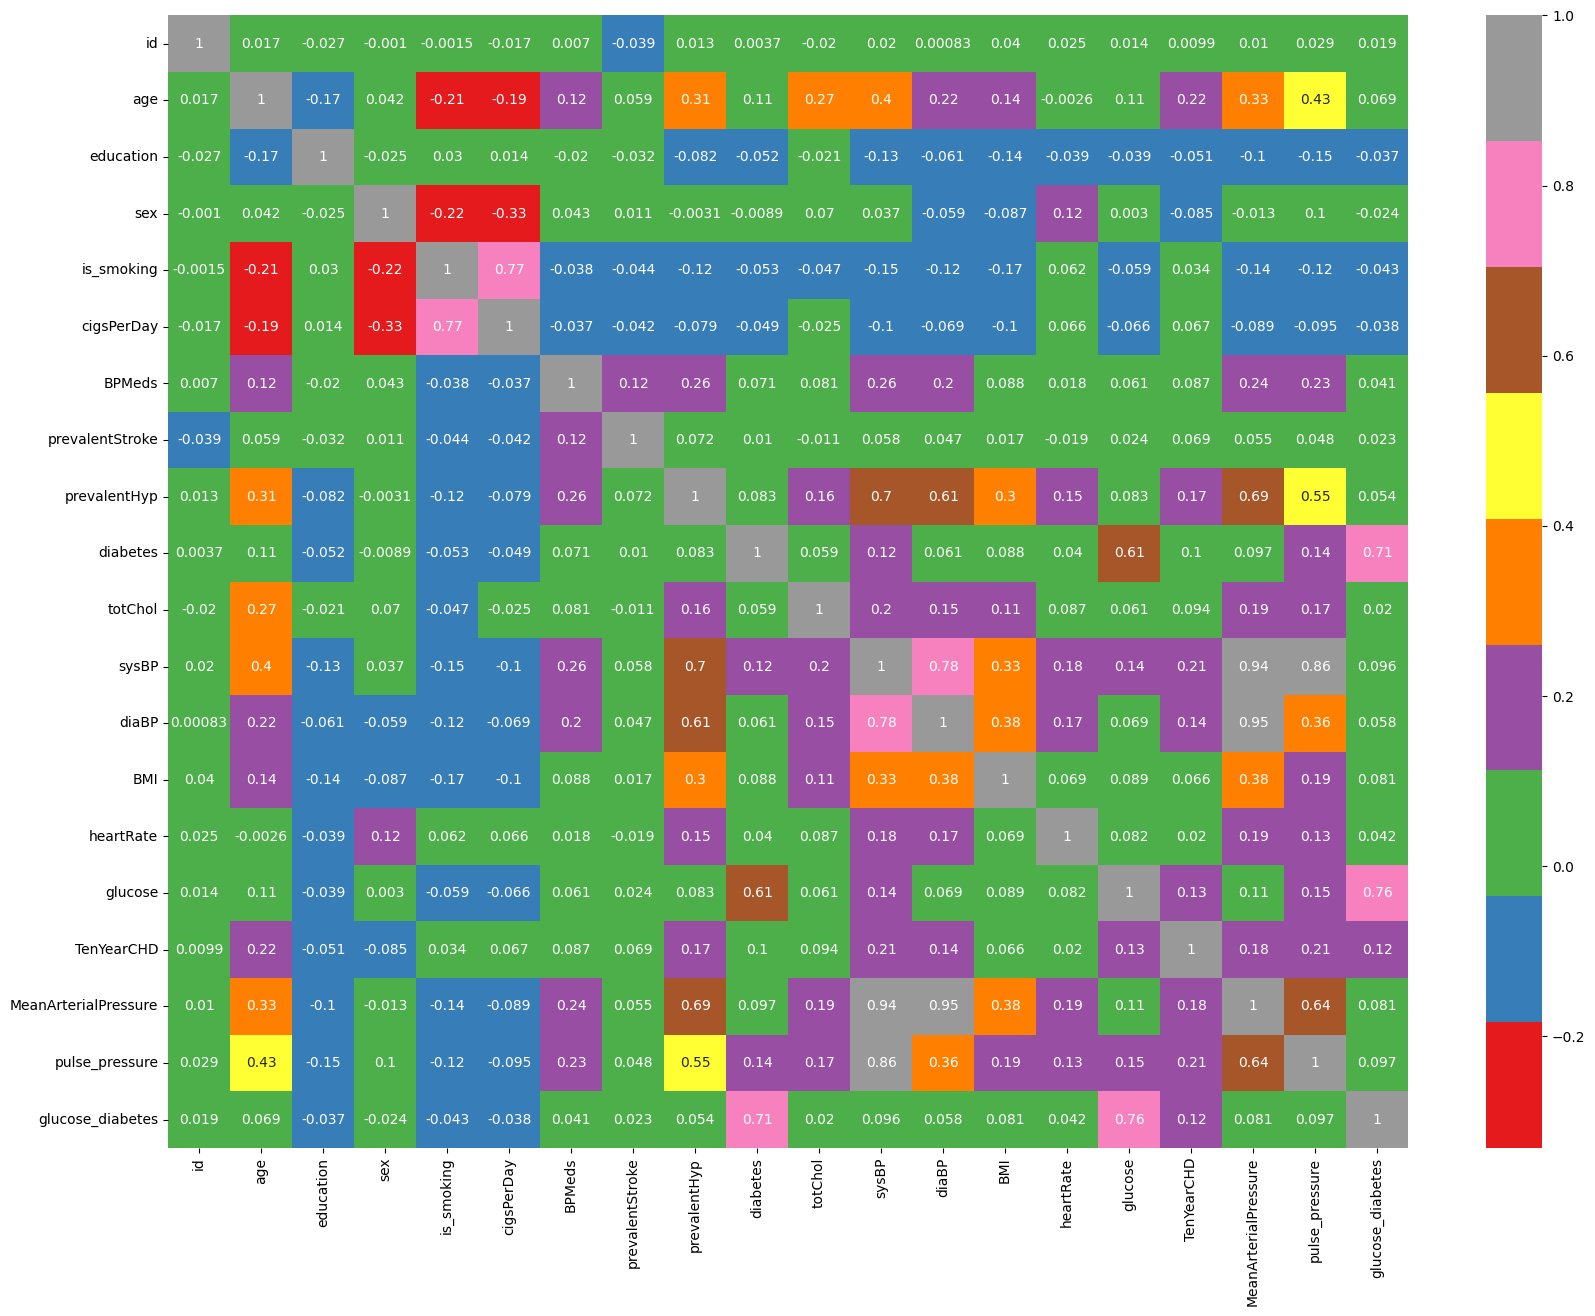

In [ ]:
## Select your features wisely to avoid overfitting
# Correlation Heatmap visualization code
plt.figure(figsize=(20,15))
sns.heatmap(df_cardio.corr(), annot=True, cmap=sns.color_palette("Set1"))

In [ ]:
# Defining a function for variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df_cardio[[i for i in df_cardio.describe().columns if i not in ['id','TenYearCHD']]])

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


variables           VIF
0                    age  4.141821e+01
1              education  4.591962e+00
2                    sex  2.761749e+00
3             is_smoking  4.970355e+00
4             cigsPerDay  4.242408e+00
5                 BPMeds  1.133037e+00
6        prevalentStroke  1.027211e+00
7           prevalentHyp  2.445573e+00
8               diabetes  2.161274e+00
9                totChol  3.119617e+01
10                 sysBP           inf
11                 diaBP           inf
12                   BMI  4.438188e+01
13             heartRate  4.002973e+01
14               glucose  3.004068e+01
15  MeanArterialPressure  1.381506e+09
16        pulse_pressure           inf
17      glucose_diabetes  3.047308e+00

Now,let's exclude sysBP,diaBP,glucose and diabetes as we have already created two new features using them.along with it we will also exclude is_smoking as it is highly correlated with cigsPerDay.

In [ ]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df_cardio[[i for i in df_cardio.describe().columns if i not in ['id','TenYearCHD','sysBP','diaBP','glucose','diabetes','is_smoking']]])

variables        VIF
0                    age  40.413472
1              education   4.535855
2                    sex   2.750326
3             cigsPerDay   1.859059
4                 BPMeds   1.130951
5        prevalentStroke   1.026605
6           prevalentHyp   2.361867
7                totChol  30.855658
8                    BMI  43.364656
9              heartRate  38.242929
10  MeanArterialPressure  99.358788
11        pulse_pressure  23.993742
12      glucose_diabetes   1.028862

Let's exclude tot_chol as it is not impacting much on target variable.

In [ ]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df_cardio[[i for i in df_cardio.describe().columns if i not in ['id','TenYearCHD','sysBP','diaBP','glucose','diabetes','is_smoking','totChol']]])

variables        VIF
0                    age  36.092901
1              education   4.491276
2                    sex   2.722305
3             cigsPerDay   1.843377
4                 BPMeds   1.130612
5        prevalentStroke   1.025790
6           prevalentHyp   2.343432
7                    BMI  42.551731
8              heartRate  37.470813
9   MeanArterialPressure  97.277224
10        pulse_pressure  23.982260
11      glucose_diabetes   1.028545

Let's exclude BMI as it is having high VIF and not impacting much on target variable.

In [ ]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df_cardio[[i for i in df_cardio.describe().columns if i not in ['id','TenYearCHD','sysBP','diaBP','glucose','diabetes','is_smoking','totChol','BMI']]])

variables        VIF
0                    age  34.698685
1              education   4.491007
2                    sex   2.710926
3             cigsPerDay   1.840476
4                 BPMeds   1.130056
5        prevalentStroke   1.025737
6           prevalentHyp   2.305703
7              heartRate  36.025180
8   MeanArterialPressure  72.784572
9         pulse_pressure  23.592181
10      glucose_diabetes   1.027639

At last, We will exclude heartRate as it is having high VIF and not impacting much on target variable.

In [ ]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df_cardio[[i for i in df_cardio.describe().columns if i not in ['id','TenYearCHD','sysBP','diaBP','glucose','diabetes','is_smoking','totChol','BMI','heartRate','education','MeanArterialPressure']]])

variables        VIF
0               age  16.250035
1               sex   2.531196
2        cigsPerDay   1.647940
3            BPMeds   1.124039
4   prevalentStroke   1.024570
5      prevalentHyp   2.063707
6    pulse_pressure  18.809109
7  glucose_diabetes   1.025981

In [ ]:
# Creating final dataframe considering above selected features
final_df= df_cardio[['age', 'education','sex','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','glucose_diabetes','pulse_pressure','TenYearCHD']]

##### What all feature selection methods have you used  and why?

We have plotted the seaborn's scatterplot and seaborn's heatmap to see the relationship of each of the feature with target variable and observed that some features like BPmeds, diabetes, totchol etc. are positively correlated with target variable. While sex, education are negatively correlated with target variable.

We have also used Filter method with correlation heatmap and VIF(various inflation factor) and excluded some of the features that were creating noise while model implimentation.Also, we have removed multicolinearity and selected features that are highly dependant on our target variable.

##### Which all features you found important and why?

We have selected below features as our final features as they are highly corelated with the target variable (Sales) and no two features are providing the same information.

'age','education','sex','cigsPerDay', 'BPMeds','prevalentStroke','prevalentHyp', 'glucose_diabetes','pulse_pressure','TenYearCHD'.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# checking which of the variables are continous in nature
for i in final_df.columns:
  print(f" {i} {final_df[i].nunique()}")

 age 39
 education 4
 sex 2
 cigsPerDay 33
 BPMeds 2
 prevalentStroke 2
 prevalentHyp 2
 glucose_diabetes 2
 pulse_pressure 173
 TenYearCHD 2


In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab 
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    stat.probplot(df[feature],dist='norm',plot=pylab)

Before Applying Transformation
Skewness of 'age','cigsPerDay'and 'pulse_pressure': 0.23, 1.23, 1.41


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Q-Q Plot for variable: age
Q-Q Plot for variable: cigsPerDay
Q-Q Plot for variable: pulse_pressure


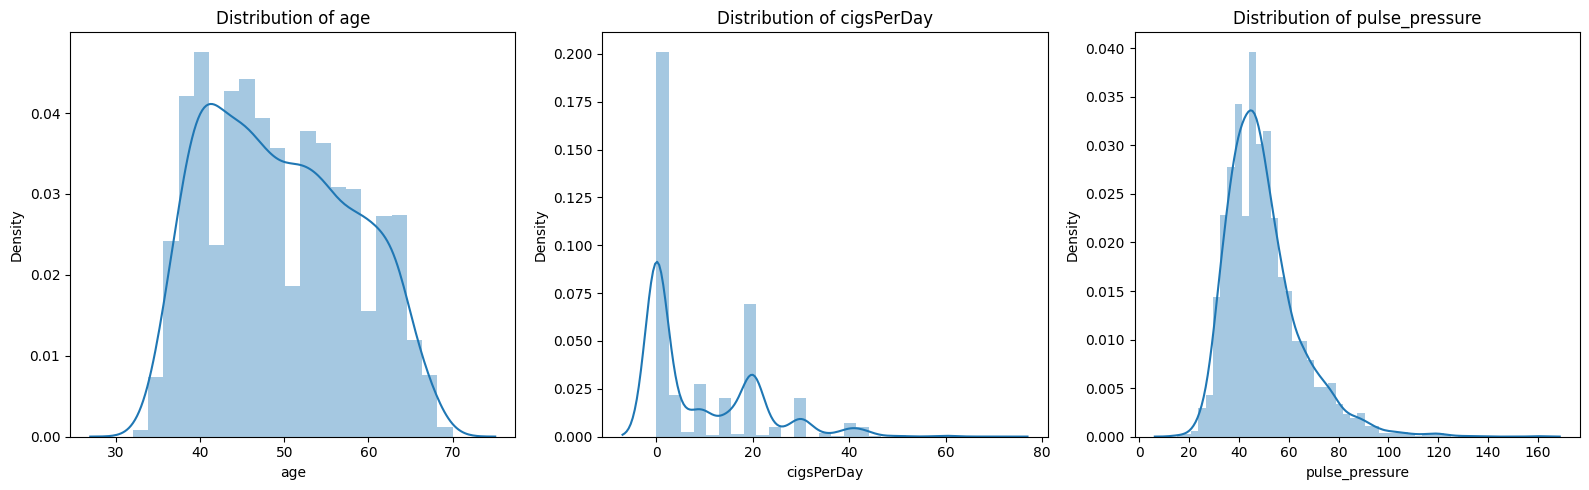

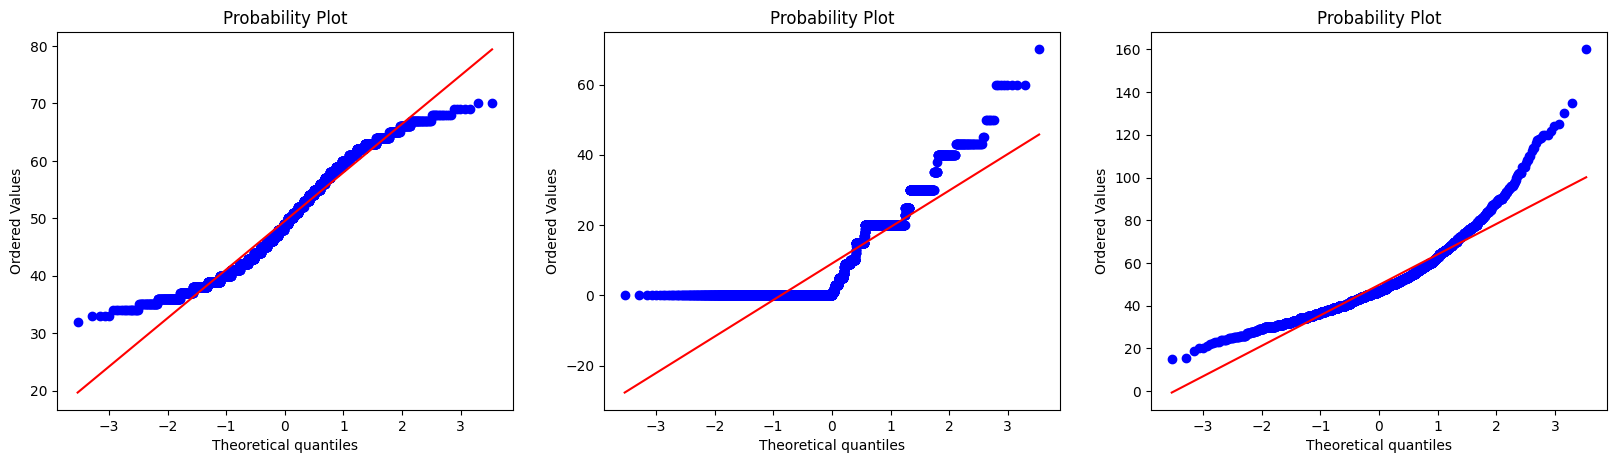

In [ ]:
# Checking the distribution and Q-Q plot of each continous variable from our final dataframe
plt.figure(figsize=(16,5))
print("Before Applying Transformation")
print(f"Skewness of 'age','cigsPerDay'and 'pulse_pressure': {round(final_df['age'].skew(),2)}, {round(final_df['cigsPerDay'].skew(),2)}, {round(final_df['pulse_pressure'].skew(),2)}")

for n,col in enumerate(['age','cigsPerDay','pulse_pressure']):
  plt.subplot(1,3,n+1)
  sns.distplot(final_df[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

plt.figure(figsize=(20,5))
for num,column in enumerate(['age','cigsPerDay','pulse_pressure']):
  plt.subplot(1,3,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(final_df,column)

plt.show()

It is clear from above distribution plots that they are not perfectly normally distributed. So we will apply some transformation techniques to get the normally disrtibuted data.



In [ ]:
# Creating 5 different copies to check the distribution of each of the variable
test_df1=final_df.copy()
test_df2=final_df.copy()
test_df3=final_df.copy()
test_df4=final_df.copy()

Logarithmic Transformation

After Applying Transformation
Skewness of 'age','cigsPerDay' and 'pulse_pressure' : -0.02, 0.28, 0.35


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Q-Q Plot for variable: age
Q-Q Plot for variable: cigsPerDay
Q-Q Plot for variable: pulse_pressure


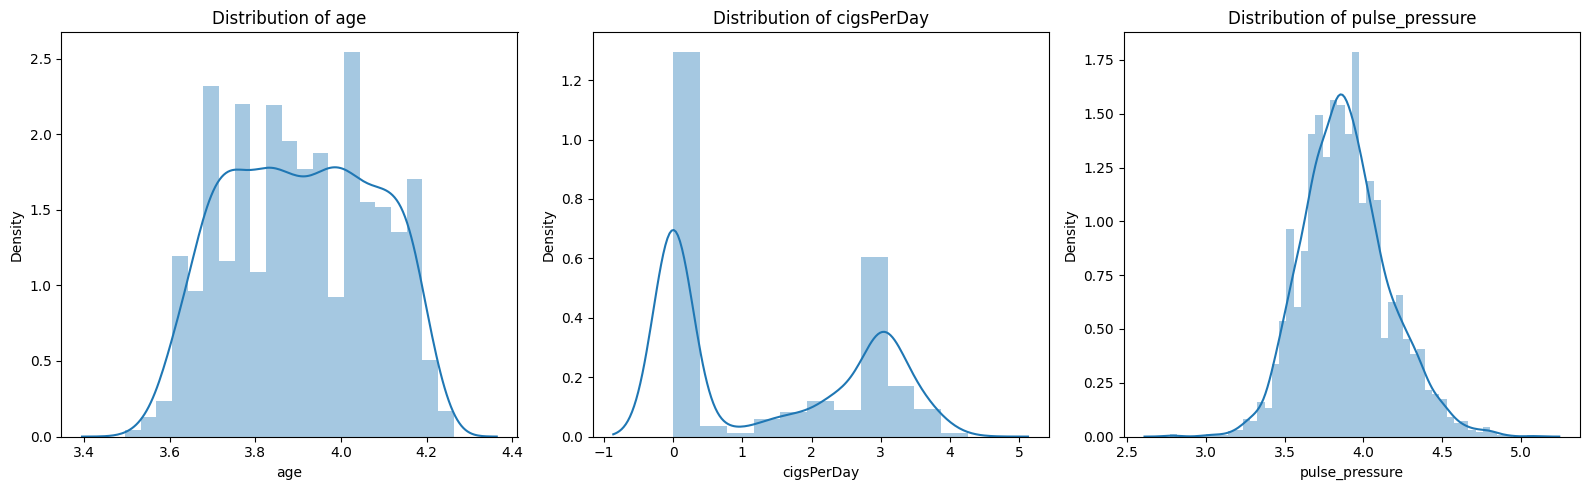

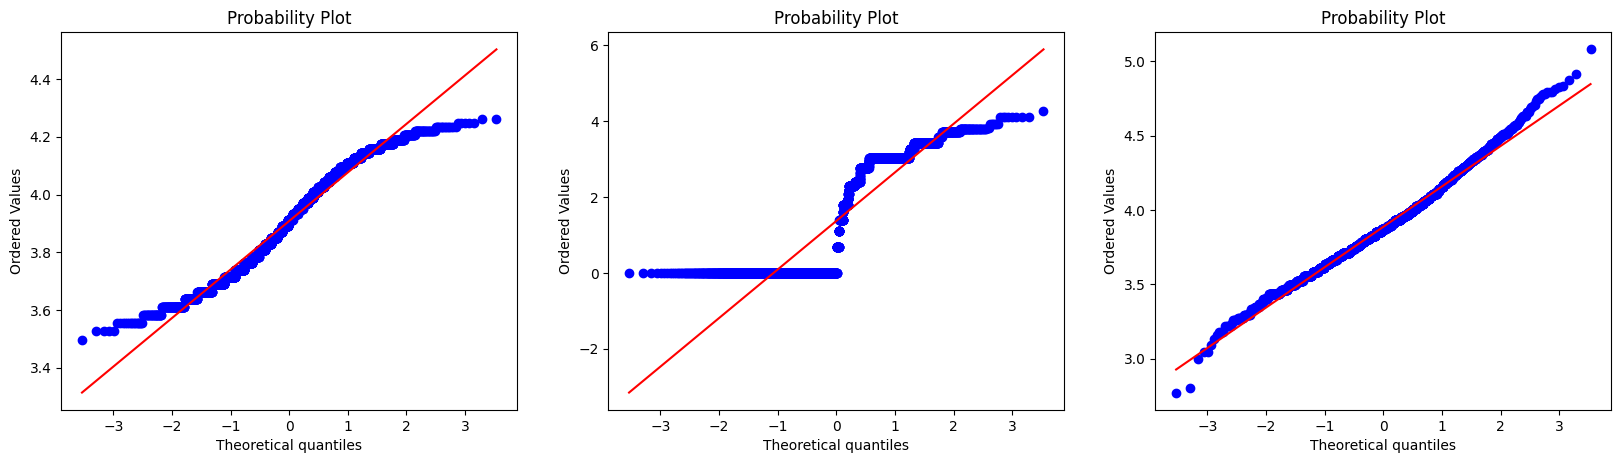

In [ ]:
# Applying transformation on the above considered columns
test_df1['age']=np.log(test_df1['age']+1)
test_df1['cigsPerDay']=np.log(test_df1['cigsPerDay']+1)
test_df1['pulse_pressure']=np.log(test_df1['pulse_pressure']+1)


# Checking the distribution and Q-Q plot of each continous variable from our final dataframe
plt.figure(figsize=(16,5))
print("After Applying Transformation")
print(f"Skewness of 'age','cigsPerDay' and 'pulse_pressure' : {round(test_df1['age'].skew(),2)}, {round(test_df1['cigsPerDay'].skew(),2)}, {round(test_df1['pulse_pressure'].skew(),2)}")

for n,col in enumerate(['age','cigsPerDay','pulse_pressure']):
  plt.subplot(1,3,n+1)
  sns.distplot(test_df1[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

plt.figure(figsize=(20,5))
for num,column in enumerate(['age','cigsPerDay','pulse_pressure']):
  plt.subplot(1,3,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df1,column)

plt.show()

Reciprocal Trnasformation

After Applying Transformation
Skewness of 'age','cigsPerDay' and 'pulse_pressure': 0.26, -0.06, 0.67


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Q-Q Plot for variable: age
Q-Q Plot for variable: cigsPerDay
Q-Q Plot for variable: pulse_pressure


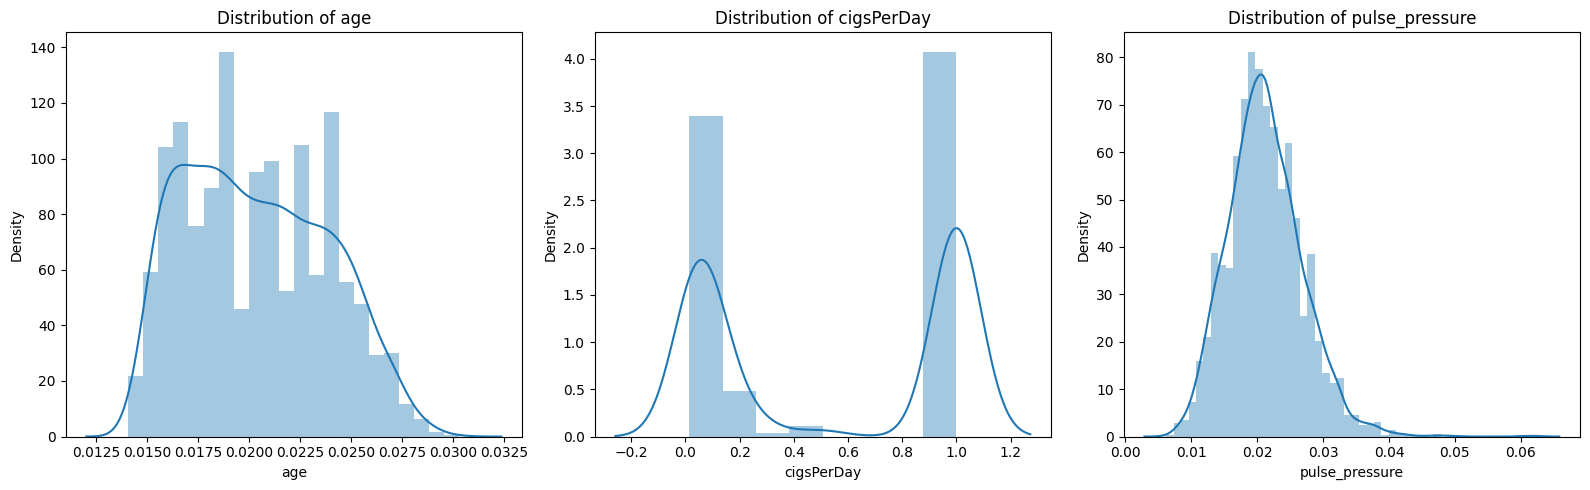

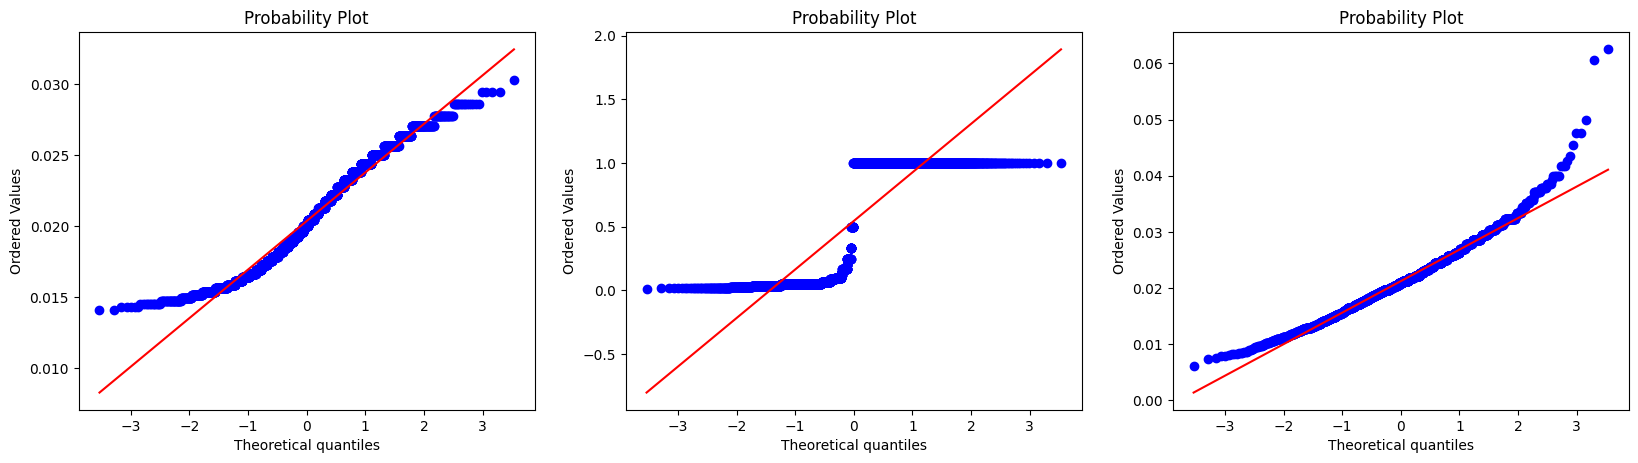

In [ ]:
# Applying transformation on the above considered columns
test_df2['age']=1/(test_df2['age']+1)
test_df2['cigsPerDay']=1/(test_df2['cigsPerDay']+1)
test_df2['pulse_pressure']=1/(test_df2['pulse_pressure']+1)


# Checking the distribution and Q-Q plot of each continous variable from our final dataframe
plt.figure(figsize=(16,5))
print("After Applying Transformation")
print(f"Skewness of 'age','cigsPerDay' and 'pulse_pressure': {round(test_df2['age'].skew(),2)}, {round(test_df2['cigsPerDay'].skew(),2)}, {round(test_df2['pulse_pressure'].skew(),2)}")

for n,col in enumerate(['age','cigsPerDay','pulse_pressure']):
  plt.subplot(1,3,n+1)
  sns.distplot(test_df2[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

plt.figure(figsize=(20,5))
for num,column in enumerate(['age','cigsPerDay','pulse_pressure']):
  plt.subplot(1,3,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df2,column)

plt.show()

From the above plots it is clear that:

Feature "age" needs Logarithmic transformation

Feature "cigsPerDay" no transformation needed

Feature "pulse_pressure" no transformation needed

### 7. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
x= final_df.drop(columns='TenYearCHD',axis=1)
y= final_df[['TenYearCHD']]

## Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

## Spliting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
# Checking the distribution of classes in training and testing sets
print("Distribution of classes of dependent variable in train :")
print(y_train.value_counts())

print("Distribution of classes of dependent variable in test :")
print(y_test.value_counts())

Distribution of classes of dependent variable in train :
TenYearCHD
0             2303
1              409
dtype: int64
Distribution of classes of dependent variable in test :
TenYearCHD
0             576
1             102
dtype: int64


##### What data splitting ratio have you used and why? 

Train Set - 80

Test Set - 20

### 8. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Data set is highly imbalanced, which is obvious. Number of people prone to cardiovascular diseases will be less as compared to number of people who are not prone, numbers denoted for people who are prone is 1 and who are not prone is 0, and this imbalanced data will give highly biased results.

0    2879
1     511
Name: TenYearCHD, dtype: int64
Percentage of majority(0) and minority class(1): 84.93 % and 15.07 %


Text(0, 0.5, 'Frequency')

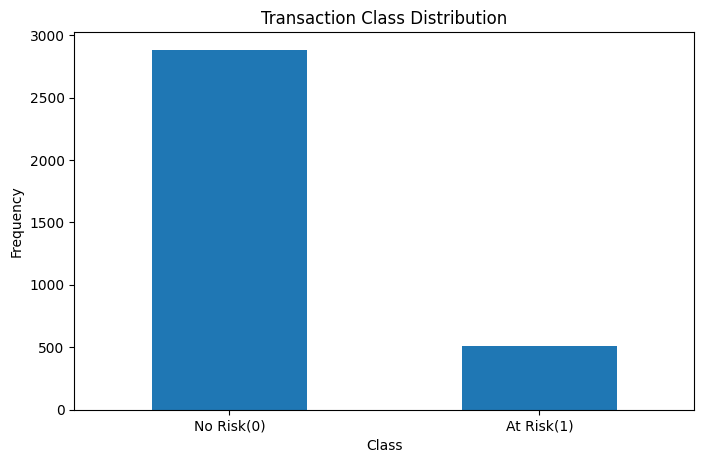

In [ ]:
# Handling Imbalanced Dataset (If needed)
print(final_df['TenYearCHD'].value_counts())
print(f"Percentage of majority(0) and minority class(1): {round(len(final_df[final_df['TenYearCHD']==0])*100/len(final_df['TenYearCHD']),2)} % and {round(len(final_df[final_df['TenYearCHD']==1])*100/len(final_df['TenYearCHD']),2)} %")

# Visualizing the imbalanced class
count_classes = pd.value_counts(final_df['TenYearCHD'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), ['No Risk(0)', 'At Risk(1)'])
plt.xlabel("Class")
plt.ylabel("Frequency")
     

In [ ]:
# Importing SMOTE for balancing the dataset
from imblearn.over_sampling import SMOTE

# Fitting the data
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)

# Checking Value counts for both classes Before and After handling Class Imbalance:
for col,label in [[y,"Before"],[y_sm,'After']]:
  print(label+' Handling Class Imbalace:')
  print(col.value_counts(),'\n')
     

Before Handling Class Imbalace:
TenYearCHD
0             2879
1              511
dtype: int64 

After Handling Class Imbalace:
TenYearCHD
0             2879
1             2879
dtype: int64 



In [ ]:
# Respliting the dataset after using SMOTE
x_smote_train, x_smote_test, y_smote_train, y_smote_test = train_test_split(x_sm,y_sm , test_size = 0.2, random_state = 0)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

It is obvious that the classes are unbalanced, which would cause the model to be more biassed in favour of the "0" class (people with no Risk of CHD). We must discover a method for training a model such that it may accept some risk and provide more results in the "1" class.


However, in a real-world scenario, our model is more beneficial because it is extremely likely that such a model will be able to anticipate whether a patient is at danger. Certainly, this would cause our model to reach a lower accuracy score since it is taking more risks for "at risk" patients.


Then, we are using SMOTETomek on the training set to address these imbalances. The Synthetic Minority Oversampling Technique, or SMOTE for short, is a type of data augmentation for the minority class. The strategy works because it generates convincing new synthetic examples from the minority class that are substantially near in feature space to already existing examples from the minority class.

**Data Scaling**

In [ ]:
## Scaling your data
# Importing StandardScaler for Data Scaling
from sklearn.preprocessing import StandardScaler

# Creating object
std_scaler= StandardScaler()

# Fit and Transform
x_smote_train= std_scaler.fit_transform(x_smote_train)
x_smote_test= std_scaler.transform(x_smote_test)

We have used StandardScaler of sklearn library to scale our data. This is important for us, as features on different scales can lead to poor performance or slow convergence. Standardizing the features also makes it easier to compare different features or observe the effect of a feature on the target variable by comparing the magnitude of its coefficient.

## ***7. ML Model Implementation***

In [ ]:
# Defining a function to train the input model and print evaluation matrics such as classification report, confusion matrix and AUC-ROC curve in visualize format
def analyse_model(model, x_train, x_test, y_train, y_test):

  '''Takes classifier model, train-set and test-set as input and prints the evaluation matrices in visualize format and returns the model'''

  # Fitting the model
  model.fit(x_train,y_train)

  # Finding best parameters
  try:
    print(f"The best parameters are: {model.best_params_}")
  except:
    pass

  # Plotting Evaluation Metrics for train and test dataset
  for x, act, label in ((x_train, y_train, 'Train-Set'),(x_test, y_test, "Test-Set")):

    # Getting required metrics
    pred = model.predict(x)
    pred_proba = model.predict_proba(x)[:,1]
    report = pd.DataFrame(classification_report(y_pred=pred, y_true=act, output_dict=True))
    fpr, tpr, thresholds = roc_curve(act, pred_proba)

    # Classification report
    plt.figure(figsize=(18,3))
    plt.subplot(1,3,1)
    sns.heatmap(report.iloc[:-1, :-2].T, annot=True, cmap=sns.color_palette("crest", as_cmap=True),fmt=".2f",annot_kws={"fontsize":14, "fontweight":"bold"},linewidths=1.0)
    plt.title(f'{label} Classification Report')
        # Confusion Matrix
    plt.subplot(1,3,2)
    matrix= confusion_matrix(y_true=act, y_pred=pred)
    sns.heatmap(matrix, annot=True, cmap=sns.color_palette("flare", as_cmap=True),fmt=".2f", annot_kws={"fontsize":14, "fontweight":"bold"},linewidths=1.0)
    plt.title(f'{label} Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')
    
    # AUC_ROC Curve
    plt.subplot(1,3,3)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
    plt.legend(loc=4)
    plt.title(f'{label} AUC_ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()

  plt.show()

  return model

### ML Model - 1 Logistic Regression

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


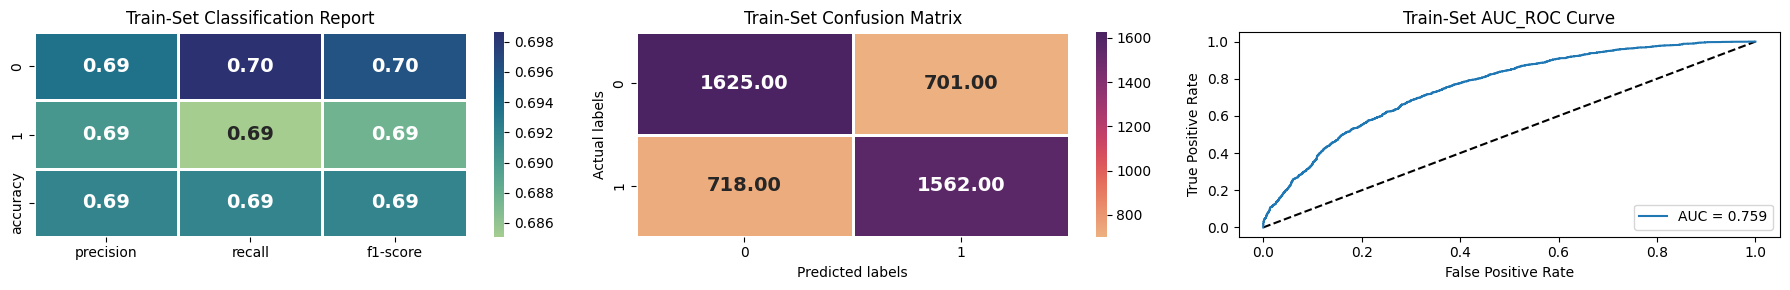

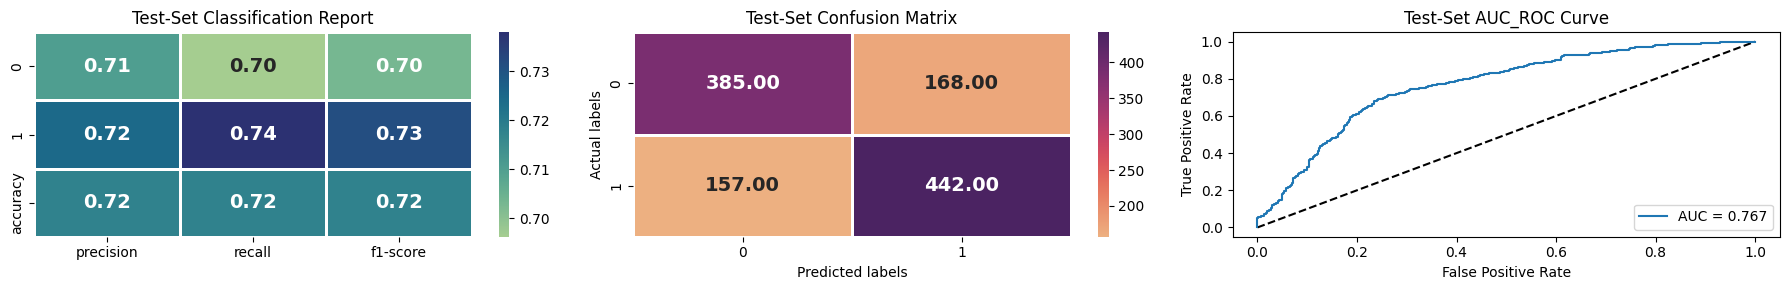

LogisticRegression(max_iter=20000)

In [ ]:
# Importing LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

# Fitting Logistic Regression Model and Visualizing evaluation Metric Score chart
logistic_classifier = LogisticRegression(fit_intercept=True, penalty='l2',max_iter=20000)
analyse_model(logistic_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)


After implimenting this model we have achieved the recall of 0.69 on the train set and 0.74 on the test set along with auc-roc score of 76% and accuracy of 70%.

Out of 1152 patients which are in our test dataset our model is predicting 827(385+442) patients and other 325(157+168) are wromgly predicted and we have to minimize the wrongly predicted patients (specially the ones who have the higher chances of infection)

#### 2. Cross- Validation & Hyperparameter Tuning

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

The best parameters are: {'max_iter': 10000, 'penalty': 'l2'}


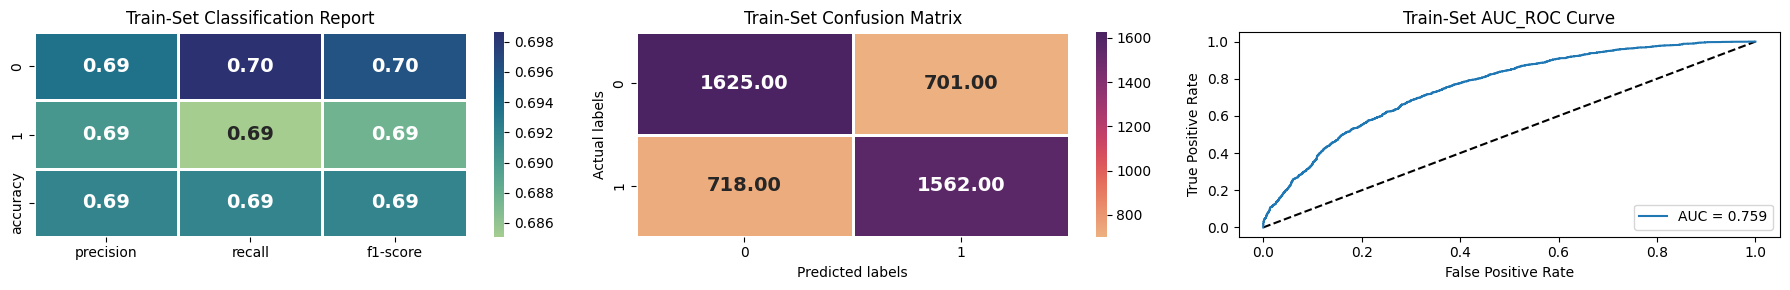

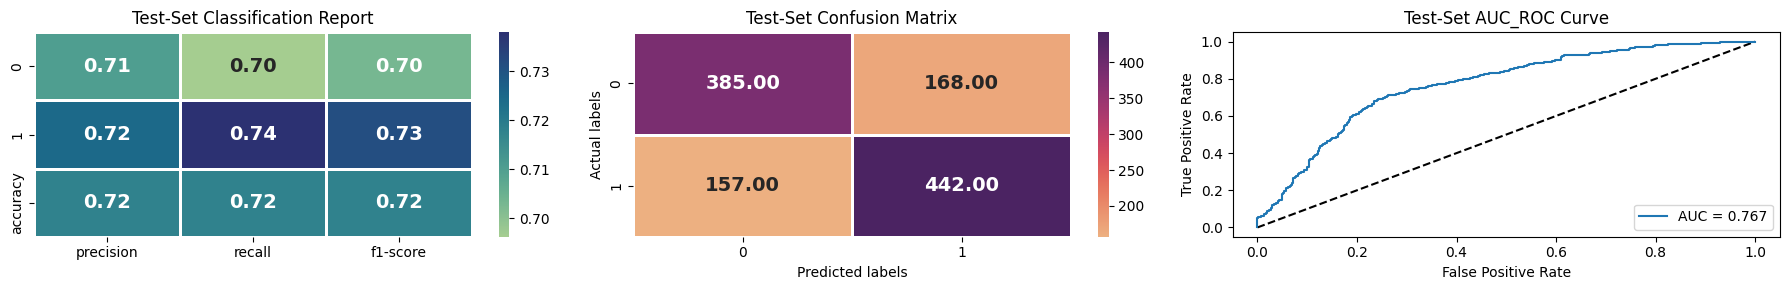

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [10000, 15000],
                         'penalty': ['l1', 'l2', 'elasticnet', None]},
             scoring='roc_auc')

In [ ]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

# Defining classifier instance
classifier= LogisticRegression()

# Defining parameters
grid_values = {'max_iter':[10000,15000], 'penalty':['l1', 'l2', 'elasticnet', None]}

# Fitting LogisticRegression Model with GridSearchCV
logistic_grid_classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Analysing the model
analyse_model(logistic_grid_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and their values. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Since we have already took 20000 itertations earlier, after adding penality term is not minimising the error furthermore. Also we are getting more accuracy in test dataset that means our model is more generalized and we should improve the complexity of the model in order to get more accurate results.

### ML Model - 2 Random Forest

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

<ipython-input-84-09d440e9dec7>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


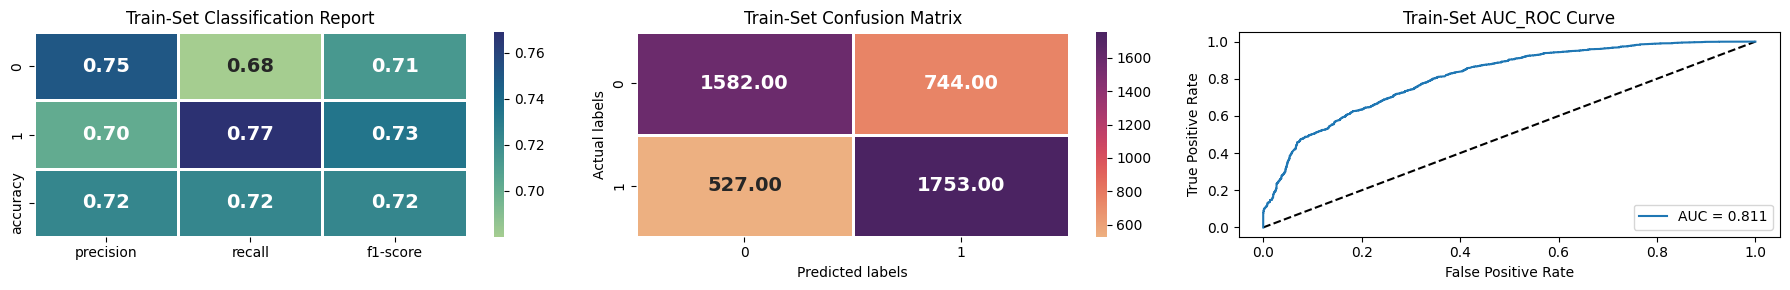

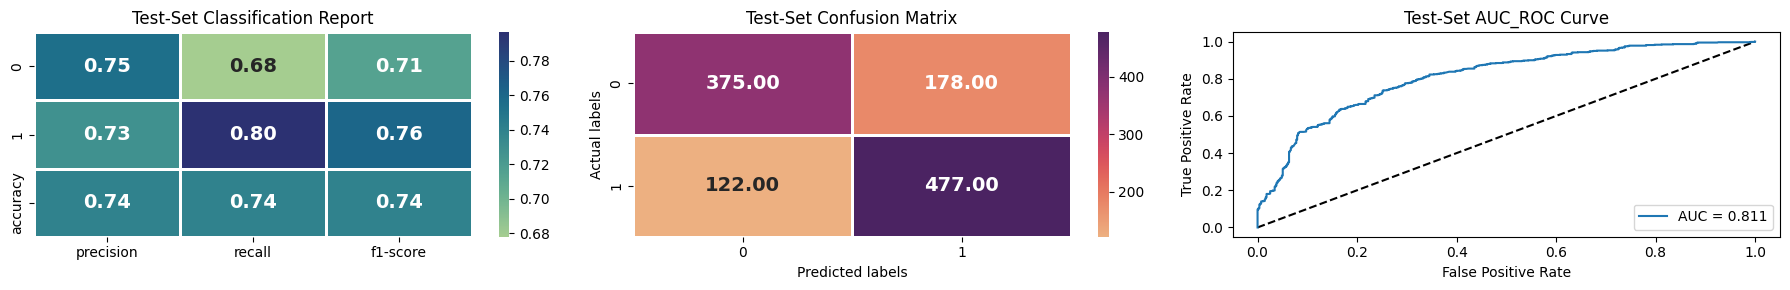

RandomForestClassifier(max_depth=3, n_estimators=500, n_jobs=-1, random_state=0)

In [ ]:
# Importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Fitting RandomForestClassifier Model
RF_classifier = RandomForestClassifier(n_estimators=500,max_depth=3,n_jobs=-1,random_state=0)

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_model(RF_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

We have the options to use Decision tree as our base model but to get the significantly good results we have used the ensemble technique of Decision tree i.e Random forest that has the capability of minimizing the error by taking different trees with different subsets.

In logistic regression we have got the recall of 0.68 for class 1 in test dataset but after implimenting random forest we got the recall of 0.80 and the auc-roc increased from 76% to 81% this means that our model is actually bifurcating the either of the two categories of the target variable.

We have also observed the f1-score of 0.71 for class 0 and 0.76 for class 1 in test set that means we are actually maintaining the trade between the precision and recall.

#### 2. Cross- Validation & Hyperparameter Tuning

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

The best parameters are: {'max_depth': 10, 'n_estimators': 300}


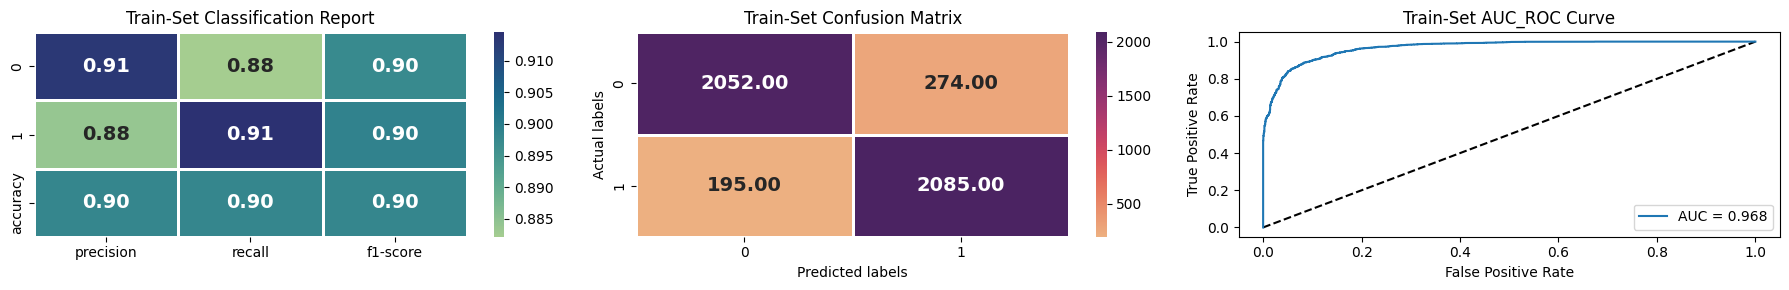

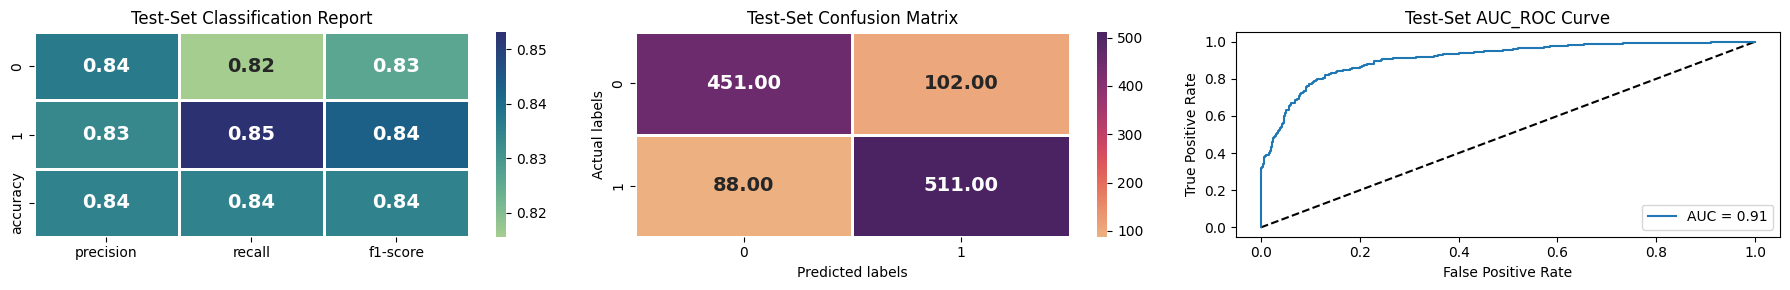

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 8, 10],
                         'n_estimators': [150, 250, 300, 350]},
             scoring='roc_auc')

In [ ]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

# Defining classifier instance
classifier= RandomForestClassifier()

# Defining parameters
grid_values = {'n_estimators':[150,250,300,350], 'max_depth':[7,8,10]}

# Fitting RandomForestClassifier Model with GridSearchCV
RF_grid_classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Analysing the model
analyse_model(RF_grid_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and provides the more accurate results. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After hyperparameter tuning of Random forest this is the first time we got the wrongly predicted patients not below 100 in each class(88 and 102) and that is  good indication. Recall of class 1 has also increased from 0.81 to 0.85 in the test set.

Also we get the accuracy of 84% and auc-roc of 91% by hyperparameter tuning of Random forest and the best parameters foundo out to be {'max_depth': 10, 'n_estimators': 350}

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

In order to minimise the errors between actual and predicted values, we evaluate our ML model using different metrics such as Recall, F-1 score, Accuracy and AUC-ROC. All these metrics try to give us an indication on how close we are with the real/expected output. In our case, each evaluation metric is showing not much difference on the train and test data which shows that our model is predicting a closer expected value.

### ML Model - 3  Naive Bayes

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


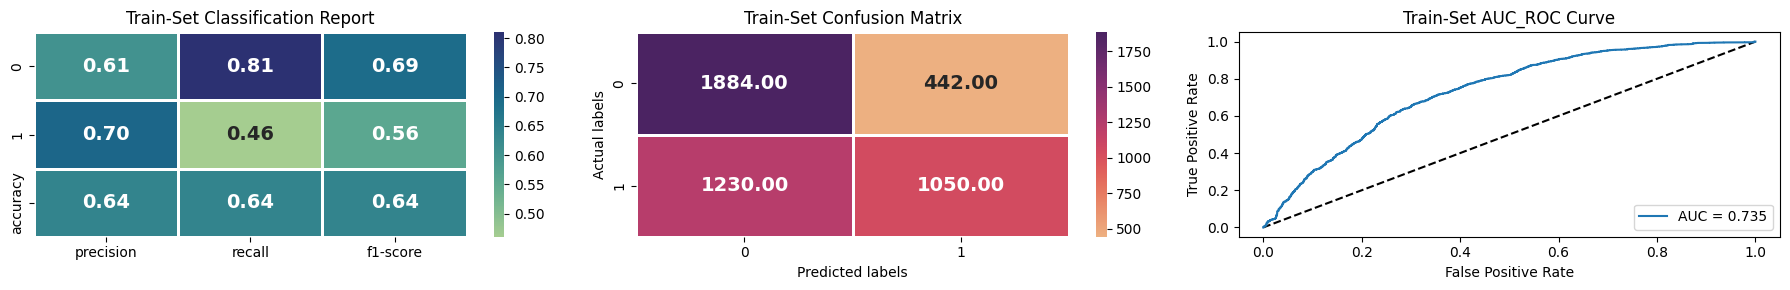

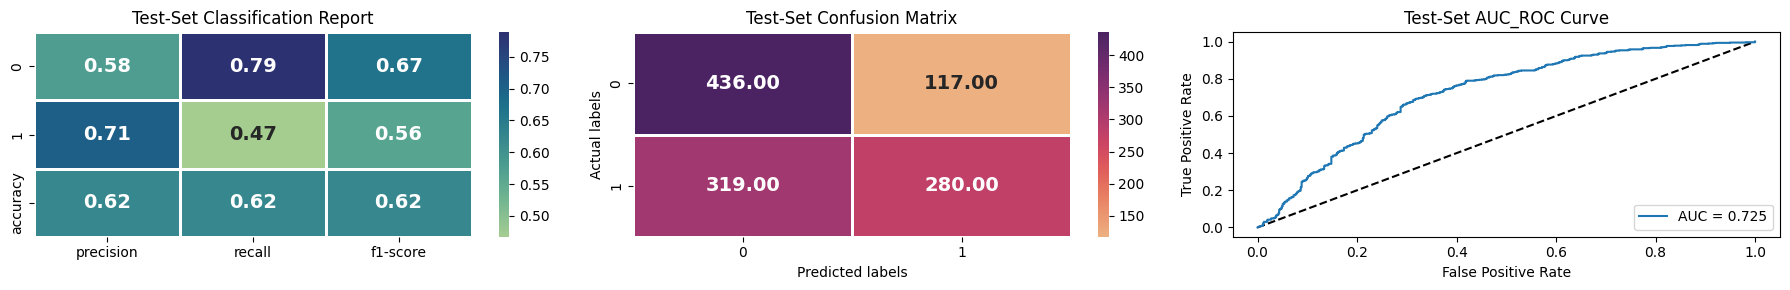

GaussianNB()

In [ ]:
# Importing GaussianNB
from sklearn.naive_bayes import GaussianNB

# Fitting GaussianNB Model
NB_classifier = GaussianNB()

# Analysing the model Visualizing evaluation Metric Score chart
analyse_model(NB_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

Naive bayes is not giving much good results as per expected. Although the auc-roc score is 0.73 which is pretty good but there are 319 FN cases(Risky) which are resulting the less recall i.e 0.47 for the minority class and this is not good for healthcare data.

**ML Model - 4 KNN**

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

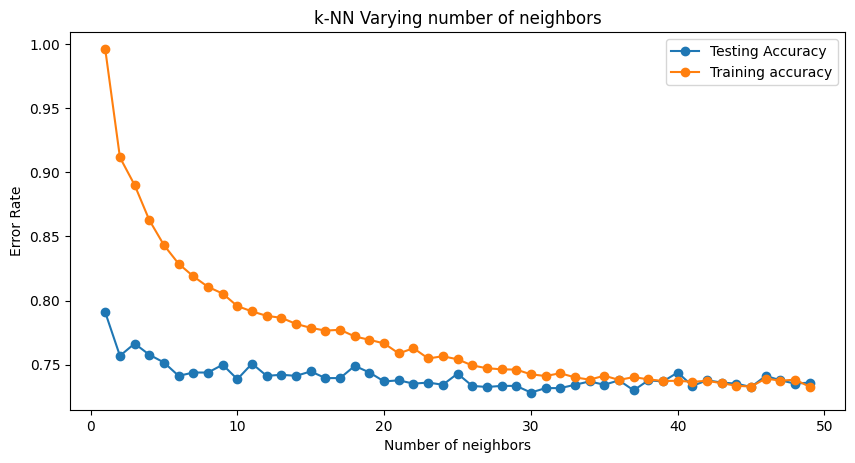

In [ ]:
## Determining the value of k in KNN
# Importing GaussianNB
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,50)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(x_smote_train, y_smote_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_smote_train, y_smote_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_smote_test, y_smote_test)

plt.figure(figsize=(10,5))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy', marker='o')
plt.plot(neighbors, train_accuracy, label='Training accuracy', marker='o')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Error Rate')
plt.show()

Here we are choosing K=9 as after it the error rate is not fluctuating and becomes stable for k>9 clusters.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


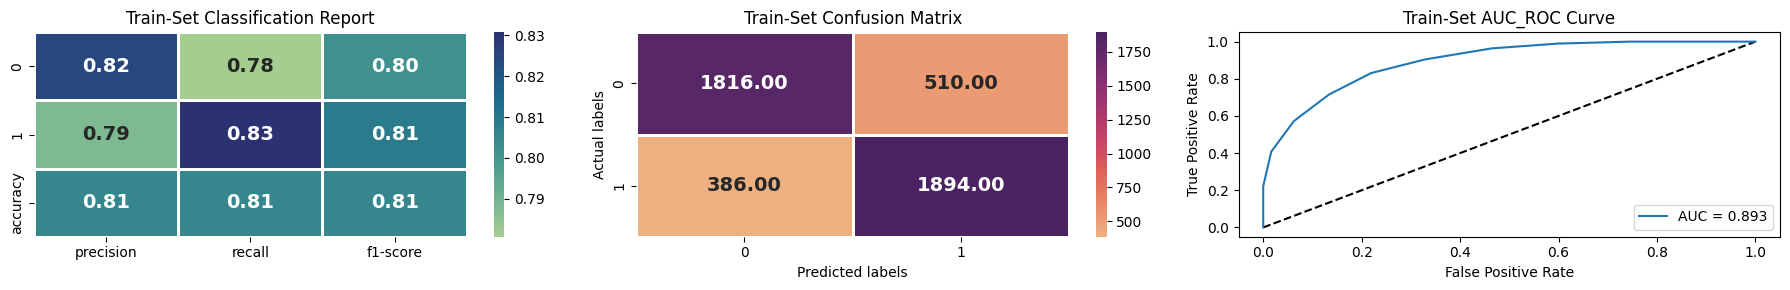

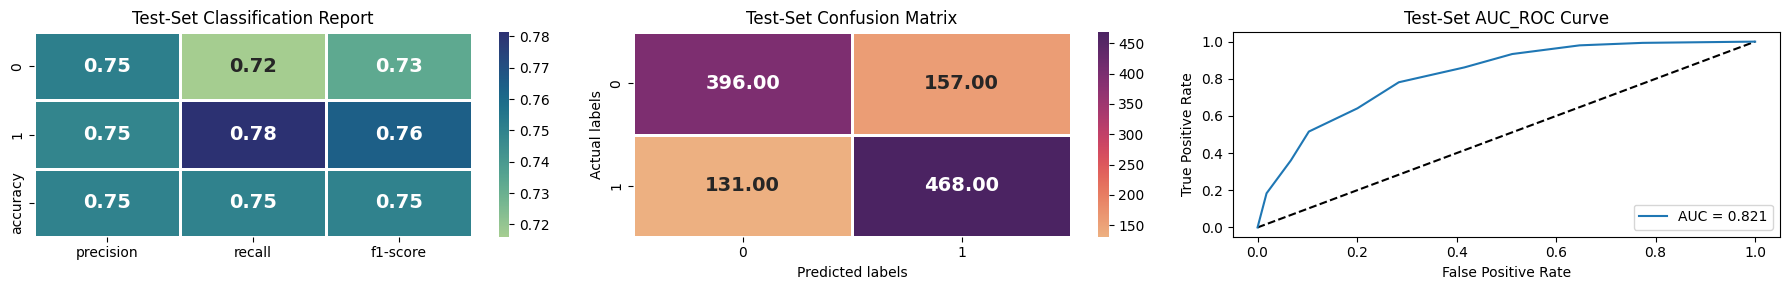

KNeighborsClassifier(n_neighbors=9)

In [ ]:
# Importing GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Fitting KNeighborsClassifier Model
KNN_classifier = KNeighborsClassifier(n_neighbors=9,p=2,metric='minkowski')

# Analysing the model Visualizing evaluation Metric Score chart
analyse_model(KNN_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

As per the classification report it is clear that our model is scoring a high recall value of 0.78 for minority class(1) but it is not very well predicting for class 0(recall= 0.70) that ultimately reduces the F-1 score.

We got the 0.82.1% area coverage in AUC-ROC that is good enough and KNN model is accurately bifurcating the positive nd negative classes.

#### 2. Cross- Validation & Hyperparameter Tuning

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

The best parameters are: {'n_neighbors': 3}


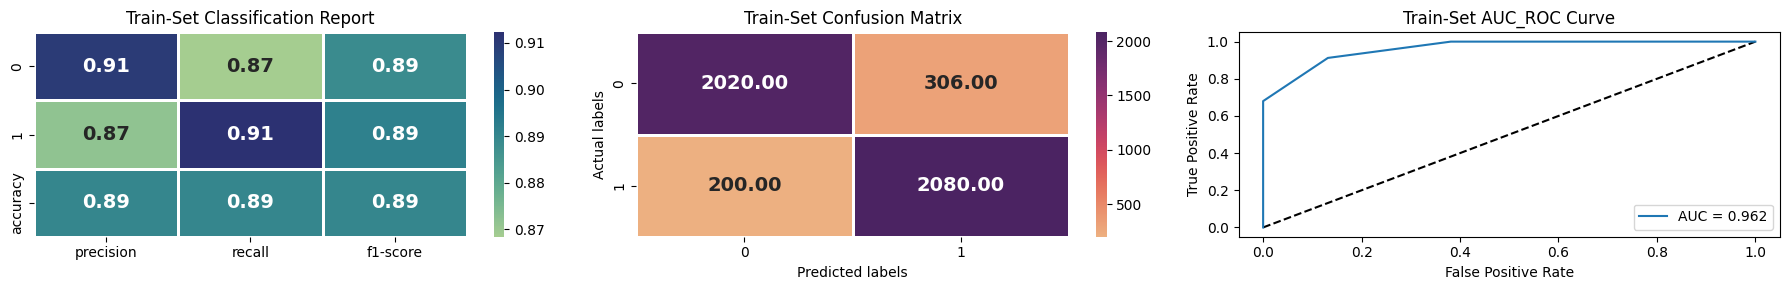

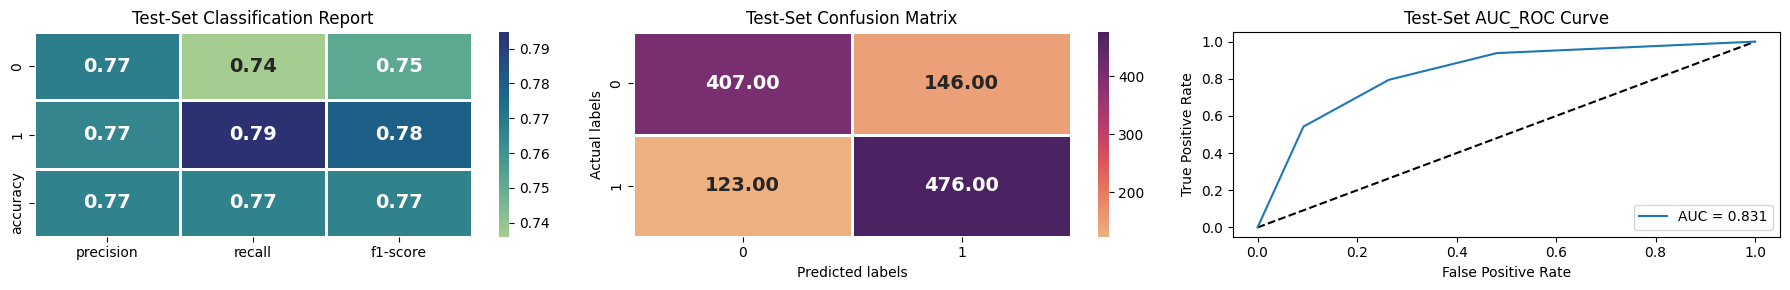

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 5, 8, 9, 15, 20]},
             scoring='roc_auc')

In [ ]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

# Defining classifier instance
classifier= KNeighborsClassifier()

# Defining parameters
grid_values = {'n_neighbors' : [1,2,3,5,8,9,15,20]}

# Fitting KNeighborsClassifier Model with GridSearchCV
KNN_grid_classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Analysing the model
analyse_model(KNN_grid_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV has been used for hyperparameter tuning. We perform hyperparameter tuning to maximize models predictive accuracy. In gridsearchCV approach, the machine learning model for a range of hyperparameter values. It searches for the best set of hyperparameter values from a grid of hyperparameter values across all posible combination.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Using GridSearchCV the best parameters are found out to be {'n_neighbors': 3} which increases the recall of minority class (0.74) and accuracy has also increased from 75% to 77% same for roc score it has been increased from 82.1% to 83.1% by hyperparameter tuning.

**ML Model - 5 XGboost**

1. Explain the ML Model and it's performance using Evaluation metric Score Chart.

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


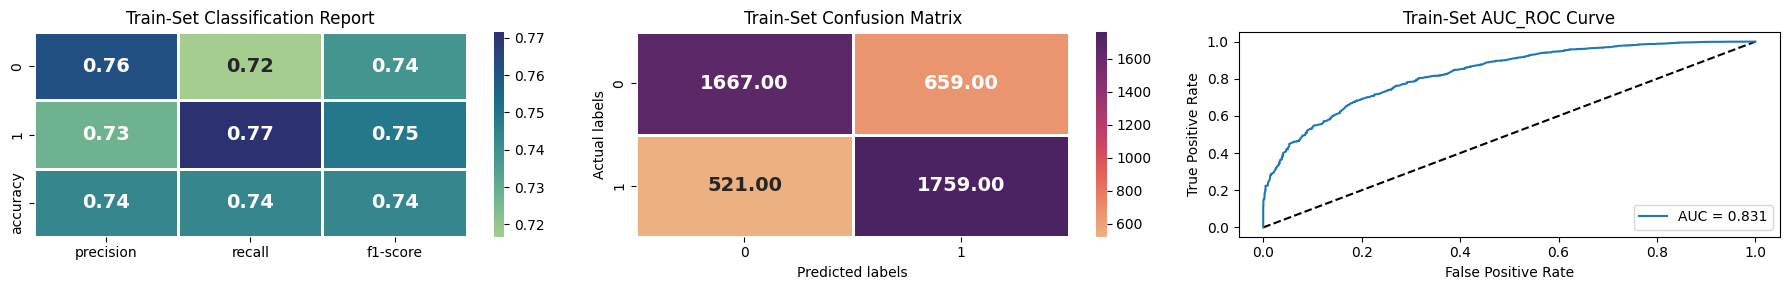

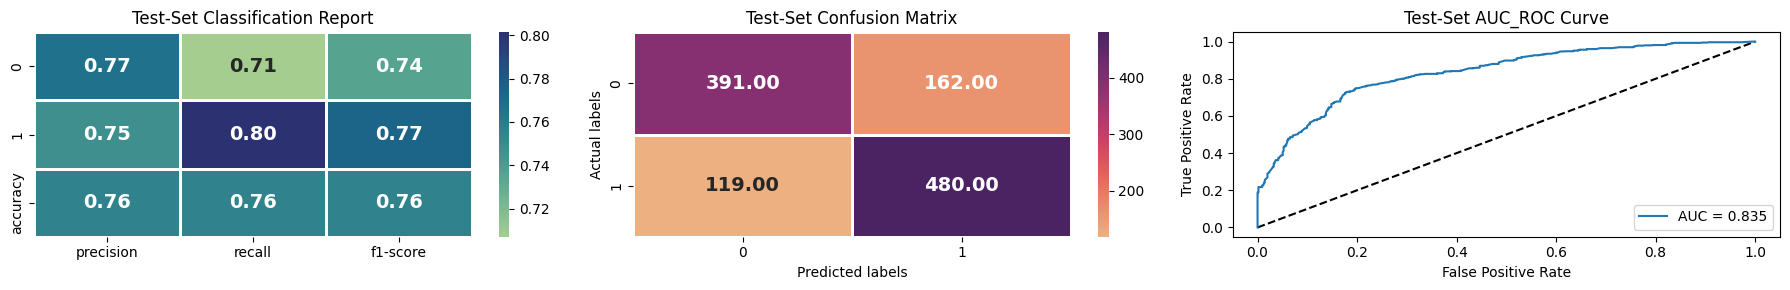

XGBClassifier(max_depth=1, n_estimators=150, n_jobs=-1)

In [ ]:
# Importing RandomForestClassifier
from xgboost import XGBClassifier

# Fitting XGBClassifier Model
XGB_classifier = XGBClassifier(n_estimators=150,max_depth=1,n_jobs=-1,random_state=0)

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_model(XGB_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

2. Cross- Validation & Hyperparameter Tuning

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

The best parameters are: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 350}


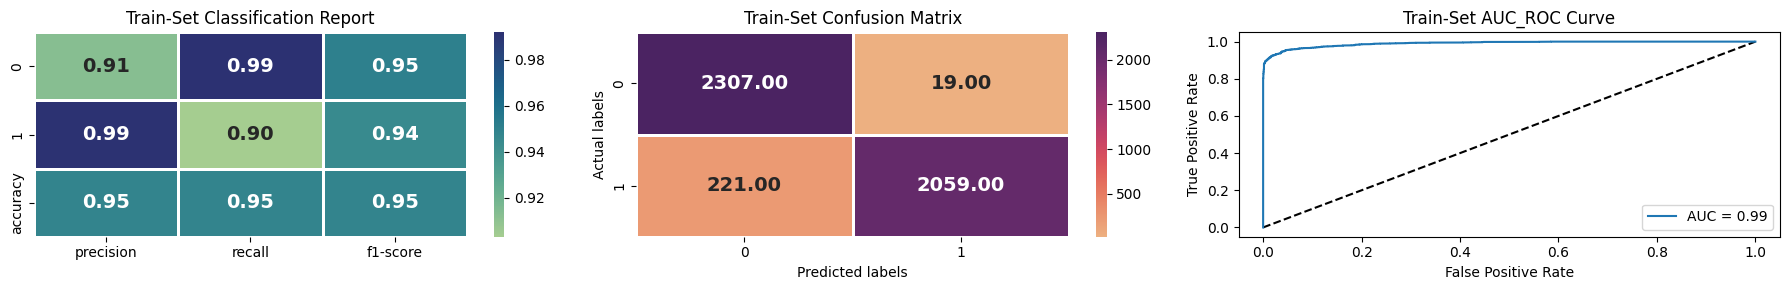

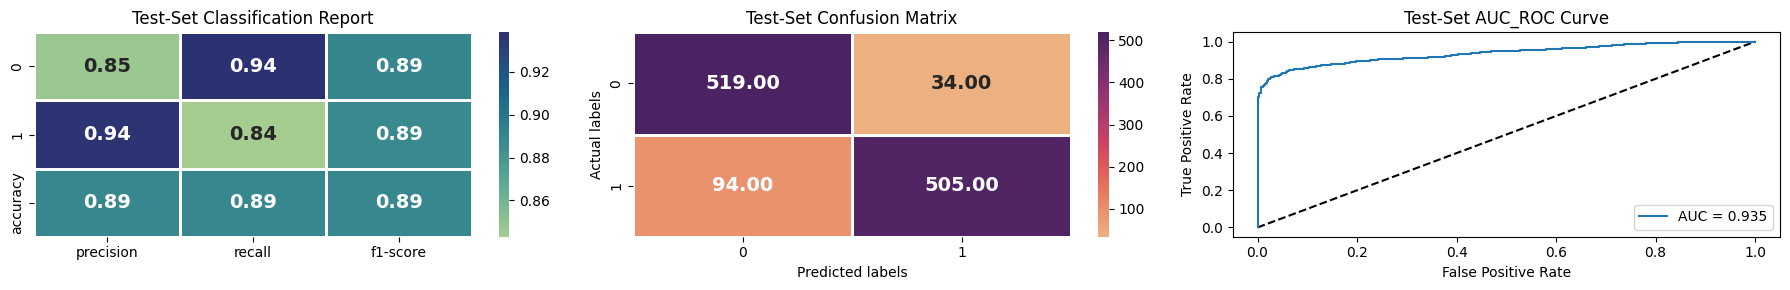

GridSearchCV(cv=3, estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [250, 300, 350]},
             scoring='roc_auc')

In [ ]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

# Defining classifier instance
classifier= XGBClassifier()

# Defining parameters
grid_values = {'learning_rate':[0.01, 0.1,1],'n_estimators':[250,300,350], 'max_depth':[2,3,4,5]}

# Fitting RandomForestClassifier Model with GridSearchCV
XGB_grid_classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=3)

# Analysing the model
analyse_model(XGB_grid_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

Which hyperparameter optimization technique have you used and why?

GridSearchCV has been used for hyperparameter tuning. We perform hyperparameter tuning to maximize models predictive accuracy. In gridsearchCV approach, the machine learning model for a range of hyperparameter values. It searches for the best set of hyperparameter values from a grid of hyperparameter values.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Achieved highest recall, precison, accuracy and F-1 score till now after tuning the hyperparameters of XGboost. Is is very clear from the confusion matrix that only 91 partients are wrongly 0(FN) predicted and 34 are wrongly 1(FP) predicted and this becomes the reason of highest precision and recall till now(since both Recall and FN are inversely proportional and vice-versa for Precision and FP).

On the other hand the F1 Score of the manjority and minority class are 89% and equal that means we equally maximiziing the precision and recall since F1 score is the harmonic mean of precision and recall and able to maintaining the trade-off between them.

The AUC-ROC curve we are obtaining has covered 93% of the area and that means our model is accurately distinguishing between the negative and the positive classes.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Since our data is of healthcare so we have majorly focuses on Recall as it contains FN(Falsely-Negative) and we do not want our model to predict the patients that may infected by CHD as healthy(Risky). In order to avoid such cases we have emphasised much of Recall.

Also we have considered F-1 score as other evaluation metric as its is the harmonic mean of the Precision and Recall and maintains a trade-off between the two (As we also don't want our model to predict the healty patients as infected).

To determine how better our model is doing we have consider Accuracy and AUC-ROC score to get the percentage of correct predictions of either of the classes among all the predictions made by the model.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Among all the 5 model we have trained so far, the highest recall, F-1 score and accuracy we are getting with XGboost. So , we are considering XGboost as our final optimal model and can give predictions on the unseen data with 89% of accuracy and can be used for deployment purpose.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

XGBoost (eXtreme Gradient Boosting) provides an efficient implementation of the gradient boosting framework. It is designed for both linear and tree-based models, and it is useful for large datasets. The basic idea behind XGBoost is to train a sequence of simple models, such as decision trees, and combine their predictions to create a more powerful model. Each tree is trained to correct the errors made by the previous trees in the sequence and this known as boosting.

XGBoost uses a technique called gradient boosting to optimize the parameters of the trees. It minimizes the loss function by adjusting the parameters of the trees in a way that reduces the error of the overall model. XGBoost also includes a number of other features, such as regularization, which helps to prevent overfitting, and parallel processing, which allows for faster training times.


**We can approach Model explainablity by Globally methods**

Globally - how features in the data collectively affect the result. eg. Logistic regression.

**Global Explainability**

Text(0.5, 0, 'Relative Importance')

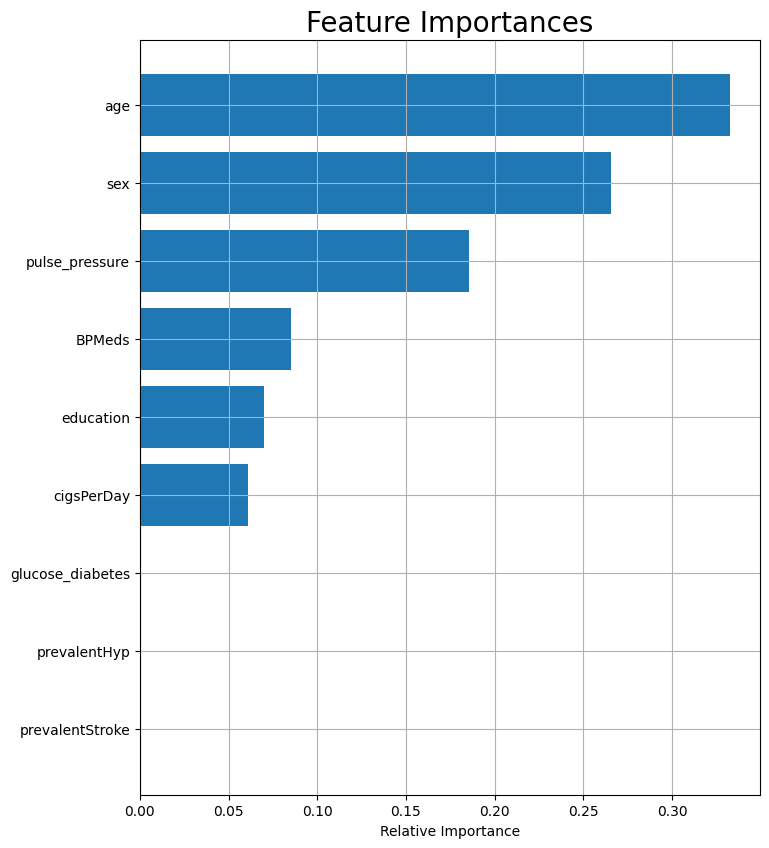

In [ ]:
# Plotting the barplot to determine which feature is contributing the most
features = final_df.columns
importances = XGB_classifier.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8,10))
plt.grid(zorder=0)
plt.title('Feature Importances', fontsize=20)
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [ ]:
# Checking the percentage of feature importance
feature_imp = pd.DataFrame(columns = ['Variable','Importance'])
feature_imp.Variable = features[:-1]
feature_imp.Importance = importances*100
feature_imp.sort_values(by="Importance",axis=0,ascending=False)

Variable  Importance
0               age   33.287437
2               sex   26.565453
8    pulse_pressure   18.554996
4            BPMeds    8.510427
1         education    6.981280
3        cigsPerDay    6.100399
5   prevalentStroke    0.000000
6      prevalentHyp    0.000000
7  glucose_diabetes    0.000000

So, we have considered XGboost as our final optimal model with very good accuracies, in order to increase the explainability we have plotted the bar plot for decresing sequence of feature importance.

From the above plot it is clear that for XGboost model "age" is contributing maximum i.e 33.28% in the final outcome, "sex" is contributing 26.56% and followed by "pulse_pressure", "BP_Meds".


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

### **Conclusions  from EDA**



* In the dataset, 56.7% of individuals are female and rest are male and males are more prone to CHD as compared to females.

* 50.24% of the individual present in the dataset are into smoking and residents who are consuming more cigarettes are at a risk of getting suffered with Heart Diseases.

* Only 2.9% people are taking BP Medicines and BP patients are having high chances of CHD.

* 0.6% and 31.5 % people have a history of strokes and hypertension respectively.
* 2.6% people have diabetes who are more** prone to CHD**.

* 15.1% people have a chance of getting heart diseases in ten years.

* In the dataset most of the population have Education Level - 1 with 42.1% and least education level 4 with 11.3% .

* With increasing age, chances of having cardiovascular disease increases. People above 65 years (i.e. old people) are more vulnerable to Heart Diseases.

* sysBP and diaBP are positively correlated with each other.

* Patients who are having stroke or hypertention history, diabetes are more prone to CHD.

* There are more males consuming cigarattes as compared to females.
* Higher glucose level lead to heart diseases resulting higher chances of **diabetic patients to cardiovascular disease**


**Conclusions  from ML Model**

* Implimented 5 classification ML Models Logistic Regression, Random forest, Naive Bayes, KNN and XGboost in our analysis.

* Considered XGboost as our final optimal model as we are getting highest recall, precision, f1 score, accuracy and auc-roc from it.

* Out of 1152 patients our optimal model is correcly predicting 457 of class 0 and 511 of class 1 patients, other 88 and 96 are FN and FP cases.
* Age, sex and pulse pressure are the highest contributing features towards the predictions.

* No overtfitting has been observed in any of the model.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***